In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
%matplotlib inline

# 3 Selecting µp pairs using detection observables
Aug 30, 2017

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/DetectionObservables/'

# pairs of tracks at close proximity

In [3]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 12.6%
4001 are other pairs, 13.2%
22562 are cosmic, 74.3%
--------------------------------------------------------------
1234 are CC 1p 0pi, 4.1%


reduced_MCbnbDATAcosmicSamples=dict(dict())
reduced_MCbnbMCcosmicSamples=dict(dict())
pureff_MCbnbMCcosmic = pd.DataFrame()
pureff_MCbnbMCcosmic_numbers = pd.DataFrame()


      
# ------------------------------------------------
# Sep-9, 2017
def get_pureff_MCbnbMCcosmic_cut(cut_name = 'PIDa', cut_label=None , reduced_MCbnbMCcosmic = dict()):
    '''
        return
        eff (mu-p) , pur (mu-p), eff (CC 1p 0pi) , pur (CC 1p 0pi)
        '''
    
    global pureff_MCbnbMCcosmic
    eff = dict()
    pur = dict()
    Nreduced_MCbnbMCcosmic , freduced_MCbnbMCcosmic = get_Nreduced_MCbnbMCcosmic(reduced_MCbnbMCcosmic=reduced_MCbnbMCcosmic)
    Ntot = (Nreduced_MCbnbMCcosmic['1mu-1p']+Nreduced_MCbnbMCcosmic['cosmic']+Nreduced_MCbnbMCcosmic['other pairs'])
    
    eff['1mu-1p'] = freduced_MCbnbMCcosmic['1mu-1p']
    pur['1mu-1p'] = 100.*Nreduced_MCbnbMCcosmic['1mu-1p']/Ntot if Ntot>0 else 0
    
    eff['CC 1p 0pi'] = freduced_MCbnbMCcosmic['CC 1p 0pi']
    pur['CC 1p 0pi'] = 100.*Nreduced_MCbnbMCcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0
    
    pureff_MCbnbMCcosmic_cut = pd.DataFrame({'label':cut_label
                                              ,'$\mu p$ eff.':'%.1f'%eff['1mu-1p']+'%'
                                              ,'$\mu p$ pur.':'%.1f'%pur['1mu-1p']+'%'
                                              ,'CC$0\pi 1 p$ eff.':'%.1f'%freduced_MCbnbMCcosmic['CC 1p 0pi']+'%'
                                              ,'CC$0\pi 1 p$ pur.':'%.1f'%(100.*Nreduced_MCbnbMCcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0)+'%'}
                                              , index=[cut_name]
                                              )
    for pair_type in pair_types: pureff_MCbnbMCcosmic_cut[pair_type] = '%.1f'%freduced_MCbnbMCcosmic[pair_type]+'%' +' (%.0f)'%Nreduced_MCbnbMCcosmic[pair_type]
    pureff_MCbnbMCcosmic = pureff_MCbnbMCcosmic.append(pureff_MCbnbMCcosmic_cut)
    reduced_MCbnbMCcosmicSamples[cut_name] = reduced_MCbnbMCcosmic
    Ntot = Nreduced_MCbnbMCcosmic['1mu-1p']+Nreduced_MCbnbMCcosmic['cosmic']+Nreduced_MCbnbMCcosmic['other pairs']
    return freduced_MCbnbMCcosmic['1mu-1p'],(100.*Nreduced_MCbnbMCcosmic['1mu-1p']/Ntot if Ntot>0 else 0),freduced_MCbnbMCcosmic['CC 1p 0pi'],(100.*Nreduced_MCbnbMCcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0)
# ------------------------------------------------m

    
# ------------------------------------------------
# Aug-30, 2017
def get_pureff_MCbnbDATAcosmic_cut(cut_name = 'PIDa', cut_label=None , reduced_MCbnbDATAcosmic = dict()):
    ''' 
        return
        eff (mu-p) , pur (mu-p), eff (CC 1p 0pi) , pur (CC 1p 0pi)
    '''
    
    global pureff_MCbnbDATAcosmic
    eff = dict()
    pur = dict()
    Nreduced_MCbnbDATAcosmic , freduced_MCbnbDATAcosmic = get_Nreduced_MCbnbDATAcosmic(reduced_MCbnbDATAcosmic=reduced_MCbnbDATAcosmic)
    Ntot = (Nreduced_MCbnbDATAcosmic['1mu-1p']+Nreduced_MCbnbDATAcosmic['cosmic']+Nreduced_MCbnbDATAcosmic['other pairs'])
    
    eff['1mu-1p'] = freduced_MCbnbDATAcosmic['1mu-1p']
    pur['1mu-1p'] = 100.*Nreduced_MCbnbDATAcosmic['1mu-1p']/Ntot if Ntot>0 else 0
    
    eff['CC 1p 0pi'] = freduced_MCbnbDATAcosmic['CC 1p 0pi']
    pur['CC 1p 0pi'] = 100.*Nreduced_MCbnbDATAcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0
    
    pureff_MCbnbDATAcosmic_cut = pd.DataFrame({'label':cut_label
                               ,'$\mu p$ eff.':'%.1f'%eff['1mu-1p']+'%'
                               ,'$\mu p$ pur.':'%.1f'%pur['1mu-1p']+'%'
                               ,'CC$0\pi 1 p$ eff.':'%.1f'%freduced_MCbnbDATAcosmic['CC 1p 0pi']+'%'
                               ,'CC$0\pi 1 p$ pur.':'%.1f'%(100.*Nreduced_MCbnbDATAcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0)+'%'}
                               , index=[cut_name]
                              )
    for pair_type in pair_types: pureff_MCbnbDATAcosmic_cut[pair_type] = '%.1f'%freduced_MCbnbDATAcosmic[pair_type]+'%' +' (%.0f)'%Nreduced_MCbnbDATAcosmic[pair_type]
    pureff_MCbnbDATAcosmic = pureff_MCbnbDATAcosmic.append(pureff_MCbnbDATAcosmic_cut)
    reduced_MCbnbDATAcosmicSamples[cut_name] = reduced_MCbnbDATAcosmic  
    Ntot = Nreduced_MCbnbDATAcosmic['1mu-1p']+Nreduced_MCbnbDATAcosmic['cosmic']+Nreduced_MCbnbDATAcosmic['other pairs']
    return freduced_MCbnbDATAcosmic['1mu-1p'],(100.*Nreduced_MCbnbDATAcosmic['1mu-1p']/Ntot if Ntot>0 else 0),freduced_MCbnbDATAcosmic['CC 1p 0pi'],(100.*Nreduced_MCbnbDATAcosmic['CC 1p 0pi']/Ntot if Ntot>0 else 0)
# ------------------------------------------------

# ------------------------------------------------
# Sep-9, 2017
def get_pureff_MCbnbMCcosmic_numbers(cut_name = 'PIDa', cut_label=None , reduced_MCbnbMCcosmic = dict()):
    global pureff_MCbnbMCcosmic_numbers
    Nreduced_MCbnbMCcosmic , freduced_MCbnbMCcosmic = get_Nreduced_MCbnbMCcosmic(reduced_MCbnbMCcosmic=reduced_MCbnbMCcosmic)
    Ntot = Nreduced_MCbnbMCcosmic['cosmic']+Nreduced_MCbnbMCcosmic['other pairs']+Nreduced_MCbnbMCcosmic['1mu-1p']
    pureff_MCbnbMCcosmic_numbers_cut = pd.DataFrame({'cut name':cut_name,
                                                      'cut label':cut_label,
                                                      'cosmic':Nreduced_MCbnbMCcosmic['cosmic'],
                                                      'other pairs':Nreduced_MCbnbMCcosmic['other pairs'],
                                                      '\mup':Nreduced_MCbnbMCcosmic['1mu-1p'],
                                                      '\CCIpOpi':Nreduced_MCbnbMCcosmic['CC 1p 0pi'],
                                                      'eff \mup':freduced_MCbnbMCcosmic['1mu-1p'],
                                                      'eff \CCIpOpi':freduced_MCbnbMCcosmic['CC 1p 0pi'],
                                                      'pur \mup':float(100*Nreduced_MCbnbMCcosmic['1mu-1p'])/Ntot if Ntot>0 else 0,
                                                      'pur \CCIpOpi':float(100*Nreduced_MCbnbMCcosmic['CC 1p 0pi'])/Ntot if Ntot>0 else 0}
                                                      , index=[cut_name]
                                                      )
    pureff_MCbnbMCcosmic_numbers = pureff_MCbnbMCcosmic_numbers.append(pureff_MCbnbMCcosmic_numbers_cut)
# ------------------------------------------------


# ------------------------------------------------
# Aug-30, 2017
def get_pureff_MCbnbDATAcosmic_numbers(cut_name = 'PIDa', cut_label=None , reduced_MCbnbDATAcosmic = dict()):
    global pureff_MCbnbDATAcosmic_numbers
    Nreduced_MCbnbDATAcosmic , freduced_MCbnbDATAcosmic = get_Nreduced_MCbnbDATAcosmic(reduced_MCbnbDATAcosmic=reduced_MCbnbDATAcosmic)
    Ntot = Nreduced_MCbnbDATAcosmic['cosmic']+Nreduced_MCbnbDATAcosmic['other pairs']+Nreduced_MCbnbDATAcosmic['1mu-1p']
    pureff_MCbnbDATAcosmic_numbers_cut = pd.DataFrame({'cut name':cut_name,
                                       'cut label':cut_label,
                                        'cosmic':Nreduced_MCbnbDATAcosmic['cosmic'],                                
                                        'other pairs':Nreduced_MCbnbDATAcosmic['other pairs'],                                
                                        '\mup':Nreduced_MCbnbDATAcosmic['1mu-1p'],                               
                                        '\CCIpOpi':Nreduced_MCbnbDATAcosmic['CC 1p 0pi'],
                                        'eff \mup':freduced_MCbnbDATAcosmic['1mu-1p'],                               
                                        'eff \CCIpOpi':freduced_MCbnbDATAcosmic['CC 1p 0pi'],
                                        'pur \mup':float(100*Nreduced_MCbnbDATAcosmic['1mu-1p'])/Ntot if Ntot>0 else 0,
                                        'pur \CCIpOpi':float(100*Nreduced_MCbnbDATAcosmic['CC 1p 0pi'])/Ntot if Ntot>0 else 0}
                                       , index=[cut_name]
                                      )
    pureff_MCbnbDATAcosmic_numbers = pureff_MCbnbDATAcosmic_numbers.append(pureff_MCbnbDATAcosmic_numbers_cut)
# ------------------------------------------------





# ------------------------------------------------
# last edit Oct-3, 2017
def apply_cuts( PIDa_p_min=12
               , delta_theta_12=60  # deg.
               , delta_Delta_phi=40 # deg.
               , theta_pq_max=25    # deg.
               , Pt_max=0.35        # GeV/c
               , opt_box=(50,100) # [Nwires x Nticks]
               , r_min_RdQ_CC1p0pi = 0.32 # sphere in U,V,Y space, apply a cut only to CC1p0pi
               , min_PE_ClosestFlash = 50
               , max_dYZ_ClosestFlash = 150
               ):
    '''
        return:
        
            pureff_MCbnbDATAcosmic
            pureff_MCbnbDATAcosmic_numbers
            pureff_MCbnbMCcosmic
            pureff_MCbnbMCcosmic_numbers
    '''
    # --- -- --- - -- -- --- --
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        reduced_MCbnbDATAcosmic[pair_type] = MCbnbDATAcosmicSamples[pair_type]
        reduced_MCbnbMCcosmic[pair_type] = MCbnbMCcosmicSamples[pair_type]
    #}
    reduced_MCbnbDATAcosmicSamples['no cut'] = reduced_MCbnbDATAcosmic
    reduced_MCbnbMCcosmicSamples['no cut'] = reduced_MCbnbMCcosmic

    # before cuts
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam
        sam = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name = 'no cut', reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name = 'no cut', reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name = 'no cut', reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name = 'no cut', reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # cut 1: PIDa
    cut_name , cut_label = 'PIDa','${PID}_a>%.0f$'%PIDa_p_min
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['PIDa_assigned_proton']>PIDa_p_min]
        sam = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['PIDa_assigned_proton']>PIDa_p_min]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # cut 2: require that the longer track is the one with larger PIDa
    cut_name , cut_label = 'length', '$l_{\\mu}>l_{p}$'
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['PIDa'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['PIDa_long'] < sam['PIDa_short']]
        sam = reduced_MCbnbMCcosmicSamples['PIDa'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['PIDa_long'] < sam['PIDa_short']]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    
    # cut 3: |\theta_{1,2}-90^0|<60^0$
    cut_name, cut_label='non-collinearity' ,'$|\theta_{1,2}-90^0|<%.0f^0$'%delta_theta_12
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['length'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[np.abs(sam['theta_12']-90)<delta_theta_12]
        sam = reduced_MCbnbMCcosmicSamples['length'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[np.abs(sam['theta_12']-90)<delta_theta_12]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # -- - -- -- - -- -- - - -- --- 
    # FLASH A: look at the closest flash to the vertex
    # -- - -- -- - -- -- - - -- --- 
    # cut 4: number of photoelectrons in the closest flash to the vertex (ClosestFlash_TotalPE)
    cut_name, cut_label='closest-flash PE' ,'$N_{PE}^{closest-flash}>%.0f$'%min_PE_ClosestFlash
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['ClosestFlash_TotalPE'] > min_PE_ClosestFlash]
        sam = reduced_MCbnbMCcosmicSamples['non-collinearity'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['ClosestFlash_TotalPE'] > min_PE_ClosestFlash]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # cut 5: distance of the closest flash to the vertex in YZ plane (ClosestFlash_YZdistance)
    cut_name, cut_label='closest-flash dYZ' ,'$d_{YZ-plane}^{closest-flash}<%.0f$ cm'%max_dYZ_ClosestFlash
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['closest-flash PE'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['ClosestFlash_YZdistance'] < max_dYZ_ClosestFlash]
        sam = reduced_MCbnbMCcosmicSamples['closest-flash PE'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['ClosestFlash_YZdistance'] < max_dYZ_ClosestFlash]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)



    
    
    # -- - -- -- - -- -- - - -- --- 
    # VERTEX ACTIVITY 
    # -- - -- -- - -- -- - - -- --- 
    # cut 6: vertex activity (RdQ)
    # for the 1mu-1p sample we do not apply a cut, which means that we stop here for 1mu-1p
    # for the CC 1p 0pi we apply a cut:
    # a sphere around RdQ=1 of radius r_min_RdQ_CC1p0pi
    # where r_min_RdQ_CC1p0pi is taken from analysis_notes/RdQ/RdQaroundVertex_cut_selection
    cut_name , cut_label = 'vertex activity' , '$\\sqrt{\\sum_{p=0,1,2}(R_{\\Delta Q}^{p}-1)^2}<%.2f$'%r_min_RdQ_CC1p0pi
    box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
    RdQu = 'RdQaroundVertex[plane 0]'+box_str
    RdQv = 'RdQaroundVertex[plane 1]'+box_str
    RdQy = 'RdQaroundVertex[plane 2]'+box_str
    
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()    
    for pair_type in pair_types:#{ 
        sam = reduced_MCbnbDATAcosmicSamples['closest-flash dYZ'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[np.sqrt(np.square(sam[RdQu]-1)+np.square(sam[RdQu]-1)+np.square(sam[RdQy]-1))<r_min_RdQ_CC1p0pi]
        sam = reduced_MCbnbMCcosmicSamples['closest-flash dYZ'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[np.sqrt(np.square(sam[RdQu]-1)+np.square(sam[RdQu]-1)+np.square(sam[RdQy]-1))<r_min_RdQ_CC1p0pi]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name=cut_name ,cut_label=cut_label , reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name=cut_name,cut_label=cut_label , reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name=cut_name, cut_label=cut_label, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # cut 5: $\Delta phi$
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
        sam = reduced_MCbnbMCcosmicSamples['vertex activity'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name = 'delta phi', cut_label='$|\Delta \phi - \pi|<%.0f^0$'%delta_Delta_phi, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name = '\CutDeltaPhi', cut_label='$|\Delta \phi - \pi|<%.0f^0$'%delta_Delta_phi, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name = 'delta phi', cut_label='$|\Delta \phi - \pi|<%.0f^0$'%delta_Delta_phi, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name = '\CutDeltaPhi', cut_label='$|\Delta \phi - \pi|<%.0f^0$'%delta_Delta_phi, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # cut 6: $\theta_{pq}<25$
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['reco_theta_pq']<theta_pq_max]
        sam = reduced_MCbnbMCcosmicSamples['delta phi'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['reco_theta_pq']<theta_pq_max]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name ='theta_pq' , cut_label= '$\theta_{pq}<%.0f^0$'%theta_pq_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name ='theta_pq' , cut_label= '$\\theta_{pq}<%.0f^0$'%theta_pq_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name ='theta_pq' , cut_label= '$\theta_{pq}<%.0f^0$'%theta_pq_max, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name ='theta_pq' , cut_label= '$\\theta_{pq}<%.0f^0$'%theta_pq_max, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # modified cut 6: $p_{t}<0.35$
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['reco_Pt']<Pt_max]
        sam = reduced_MCbnbMCcosmicSamples['delta phi'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['reco_Pt']<Pt_max]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name='soft Pt', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name='soft Pt', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name='soft Pt', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name='soft Pt', cut_label='$p_{t}<%.2f$ GeV/c'%Pt_max, reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)


    # tight Pt cut for good Ev reconstruction
    reduced_MCbnbDATAcosmic = dict()
    reduced_MCbnbMCcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['theta_pq'][pair_type]
        reduced_MCbnbDATAcosmic[pair_type] = sam[sam['reco_Pt']<0.15]
        sam = reduced_MCbnbMCcosmicSamples['theta_pq'][pair_type]
        reduced_MCbnbMCcosmic[pair_type] = sam[sam['reco_Pt']<0.15]
    #}
    get_pureff_MCbnbDATAcosmic_cut(cut_name ='tight Pt', cut_label= '$p_{t}<0.15$ GeV/c', reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbDATAcosmic_numbers(cut_name ='tight Pt', cut_label= '$p_{t}<0.15$ GeV/c', reduced_MCbnbDATAcosmic = reduced_MCbnbDATAcosmic)
    get_pureff_MCbnbMCcosmic_cut(cut_name ='tight Pt', cut_label= '$p_{t}<0.15$ GeV/c', reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)
    get_pureff_MCbnbMCcosmic_numbers(cut_name ='tight Pt', cut_label= '$p_{t}<0.15$ GeV/c', reduced_MCbnbMCcosmic = reduced_MCbnbMCcosmic)



    return pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers,pureff_MCbnbMCcosmic,pureff_MCbnbMCcosmic_numbers
# ------------------------------------------------

In [5]:
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.33)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff

pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers,pureff_MCbnbMCcosmic,pureff_MCbnbMCcosmic_numbers = apply_cuts(PIDa_p_min=12,
                                                                                                                     min_PE_ClosestFlash=200,
                                                                                                                     delta_Delta_phi=40,
                                                                                                                     r_min_RdQ_CC1p0pi=0.32)

In [6]:
pureff_MCbnbDATAcosmic

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,12.6%,100.0%,4.1%,no cut,100.0% (3814),100.0% (4001),100.0% (22562),100.0% (1234)
PIDa,79.9%,45.6%,76.1%,14.0%,${PID}_a>12$,79.9% (3046),38.4% (1536),9.3% (2102),76.1% (939)
length,64.0%,59.4%,63.9%,19.2%,$l_{\mu}>l_{p}$,64.0% (2440),20.3% (812),3.8% (855),63.9% (789)
non-collinearity,58.5%,70.8%,61.4%,24.0%,"$|\theta_{1,2}-90^0|<60^0$",58.5% (2231),14.2% (570),1.6% (351),61.4% (758)
vertex activity,34.2%,78.3%,53.2%,39.4%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",34.2% (1306),5.9% (235),0.6% (127),53.2% (657)
delta phi,24.1%,87.7%,47.9%,56.3%,$|\Delta \phi - \pi|<40^0$,24.1% (921),2.1% (85),0.2% (44),47.9% (591)
theta_pq,17.5%,95.4%,39.4%,69.4%,$\theta_{pq}<25^0$,17.5% (668),0.8% (32),0.0% (0),39.4% (486)
soft Pt,20.2%,94.6%,42.9%,65.1%,$p_{t}<0.35$ GeV/c,20.2% (769),1.1% (43),0.0% (1),42.9% (529)
tight Pt,9.3%,95.7%,22.4%,74.9%,$p_{t}<0.15$ GeV/c,9.3% (354),0.4% (16),0.0% (0),22.4% (277)
PIDa-,83.3%,43.5%,79.4%,13.4%,${PID}_a>11$,83.3% (3178),41.5% (1660),10.9% (2469),79.4% (980)


# what is the best identification method for The µ and the p?

In [7]:
# 3.I.1 overview 
mup = MCbnbDATAcosmicSamples['1mu-1p']
Ntot = len(mup)
# mu_long = mup[mup['l_long']==mup['l_muon']]
mu_long = mup[mup['pdg_long']==13]
N_mu_long = len(mu_long)
frac_mu_long = float(N_mu_long)/Ntot
print 'µ is long in %.2f'%(100*frac_mu_long),'%'

# p_long = mup[mup['l_long']==mup['l_proton']]
p_long = mup[mup['pdg_long']==2212]
N_p_long = len(p_long)
frac_p_long = float(N_p_long)/Ntot
print 'p is long in %.2f'%(100*frac_p_long),'%'


# mu_small_PIDa = mup[mup['l_small_PIDa']==mup['l_muon']]
mu_small_PIDa = mup[mup['pdg_small_PIDa']==13]
N_mu_small_PIDa = len(mu_small_PIDa)
frac_mu_small_PIDa = float(N_mu_small_PIDa)/Ntot
print 'µ with small PIDa in %.2f'%(100*frac_mu_small_PIDa),'%'


small_PIDa_long = mup[mup['pdg_small_PIDa']==mup['pdg_long']]
# small_PIDa_long = mup[mup['l_small_PIDa']==mup['l_long']]
N_small_PIDa_long = len(small_PIDa_long)
frac_small_PIDa_long = float(N_small_PIDa_long)/Ntot
print 'small PIDa = long in %.2f'%(100*frac_small_PIDa_long),'%'

# mu_small_PIDa_long = mup[(mup['l_small_PIDa']==mup['l_muon'])& (mup['l_long']==mup['l_muon'])]
mu_small_PIDa_long = mup[(mup['pdg_small_PIDa']==13)&(mup['pdg_long']==13)]
N_mu_small_PIDa_long = len(mu_small_PIDa_long)
frac_mu_small_PIDa_long = float(N_mu_small_PIDa_long)/Ntot
print 'µ with small PIDa and long in %.2f'%(100*frac_mu_small_PIDa_long),'%'
print 
print 'in DetectionObservables.tex'
print '% paste below from notebook:'
print 
print '		In the method based on the track length, we found that a correct identification is obtained in $%.0f'%(100*frac_mu_long)+' \pm 1\%$ of the pairs. '
print '		In the method based on the $PID_a$, we found that a correct identification is obtained in $%.0f'%(100*frac_mu_small_PIDa)+' \pm 1\%$ of the pairs. '
print '		Combining the two methods, yields a correct identification in $%.0f'%(100*frac_mu_small_PIDa_long/frac_small_PIDa_long)+' \pm 1\%$ of the cases. '
print '		The combined selection costs a reduction of $%.0f'%(100*(1-frac_small_PIDa_long))+' \pm 1\%$ of the events, those in which the longer track was not the track with the smaller $PID_a$'

µ is long in 88.59 %
p is long in 11.41 %
µ with small PIDa in 86.16 %
small PIDa = long in 77.79 %
µ with small PIDa and long in 76.27 %

in DetectionObservables.tex
% paste below from notebook:

		In the method based on the track length, we found that a correct identification is obtained in $89 \pm 1\%$ of the pairs. 
		In the method based on the $PID_a$, we found that a correct identification is obtained in $86 \pm 1\%$ of the pairs. 
		Combining the two methods, yields a correct identification in $98 \pm 1\%$ of the cases. 
		The combined selection costs a reduction of $22 \pm 1\%$ of the events, those in which the longer track was not the track with the smaller $PID_a$


### 3.I.2 $PID_{a}$ of the proton and the muon candidates 

In [8]:
PIDaCut = 12

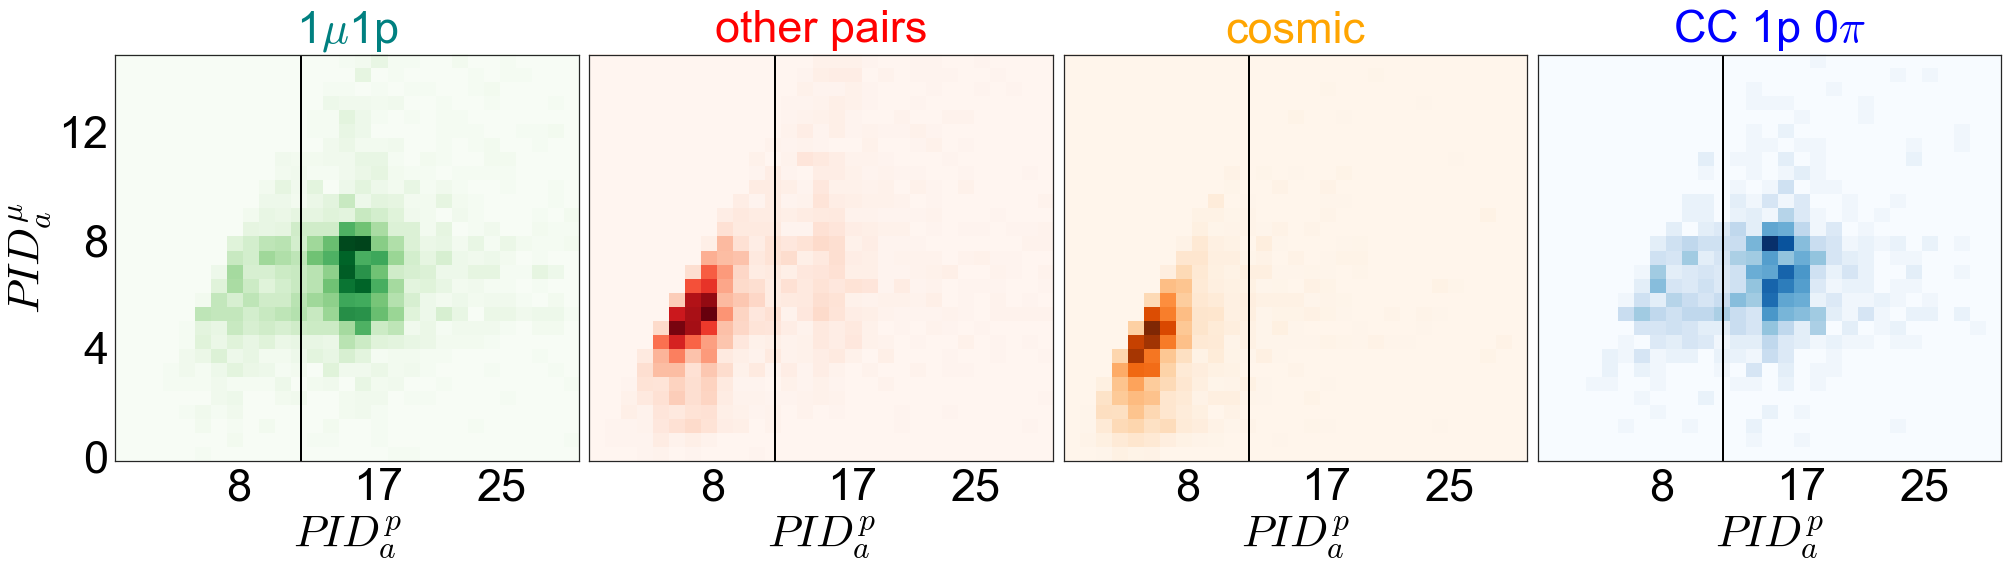

In [9]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,30,30),np.linspace(0,15,30))
x_label,y_label='$PID_{a}^{p}$','$PID_{a}^{\\mu}$'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    plot_2d_hist(sample['PIDa_assigned_proton'], sample['PIDa_assigned_muon'], ax=ax,fontsize=25,ticks_color='white',bins=bins,cmap=cmap,norm='')            
    plt.plot([PIDaCut,PIDaCut],ax.get_ylim(),'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45,xticks=[8,17,25],yticks=[0,4,8,12])
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'PIDa_mu_p.pdf')

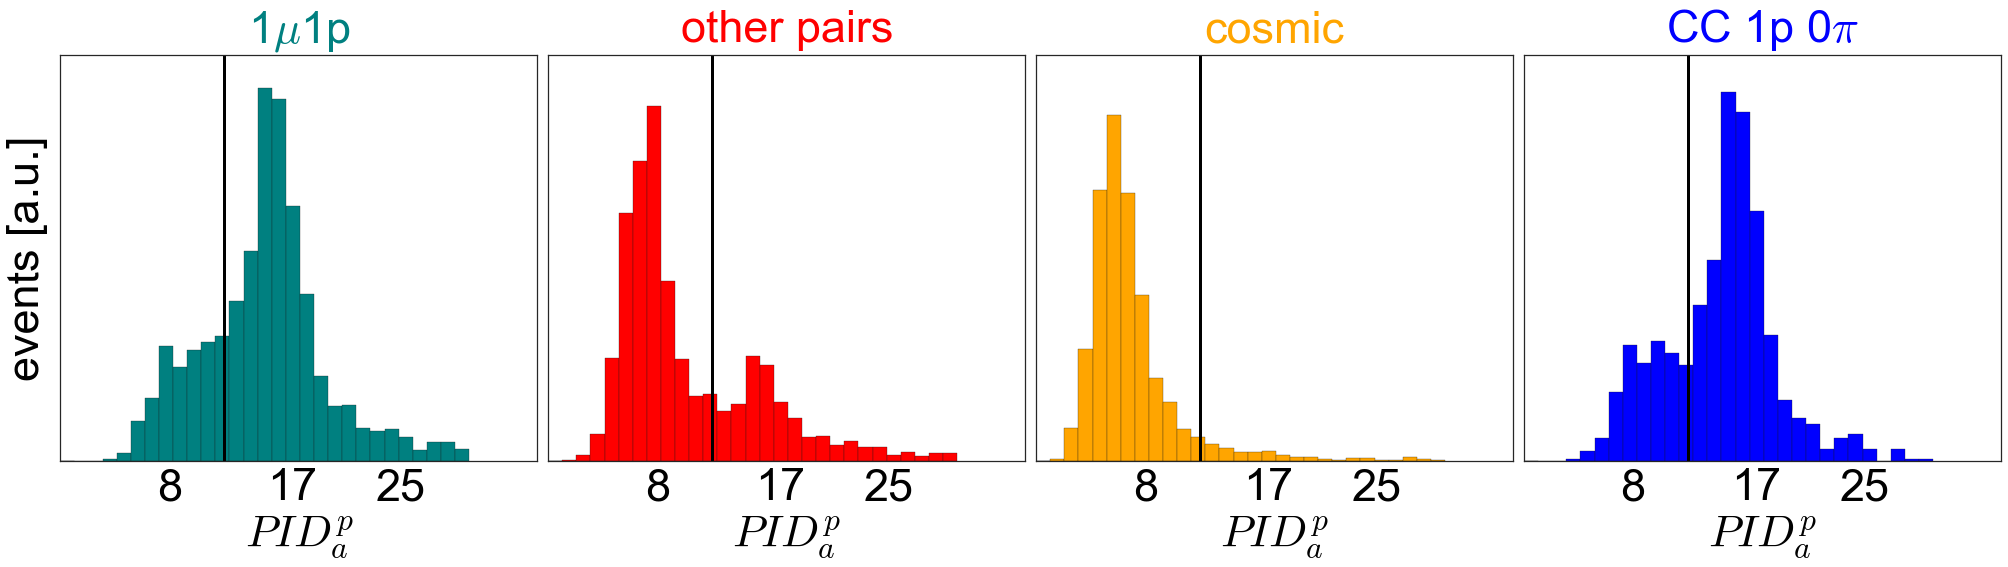

In [10]:
# 1D version
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,30,30))
x_label,y_label='$PID_{a}^{p}$','events [a.u.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plt.hist(sample['PIDa_assigned_proton'],bins=bins,color=color)
    plt.plot([PIDaCut,PIDaCut],ax.get_ylim(),'-',color='black',linewidth=3)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45,xticks=[8,17,25],yticks=[0,4,8,12])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'PIDa_p_1D.pdf')

##### 3.I.3 tracks length

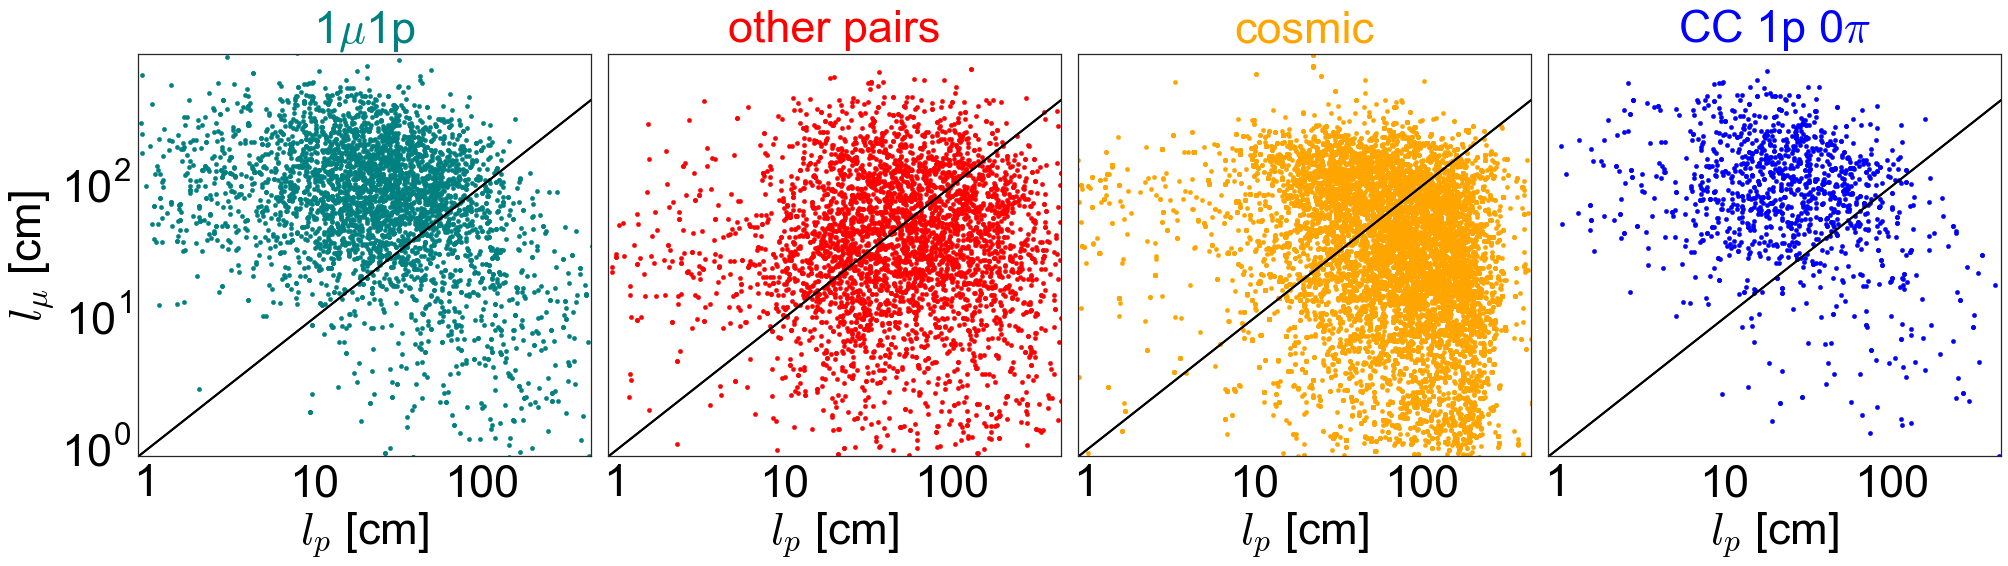

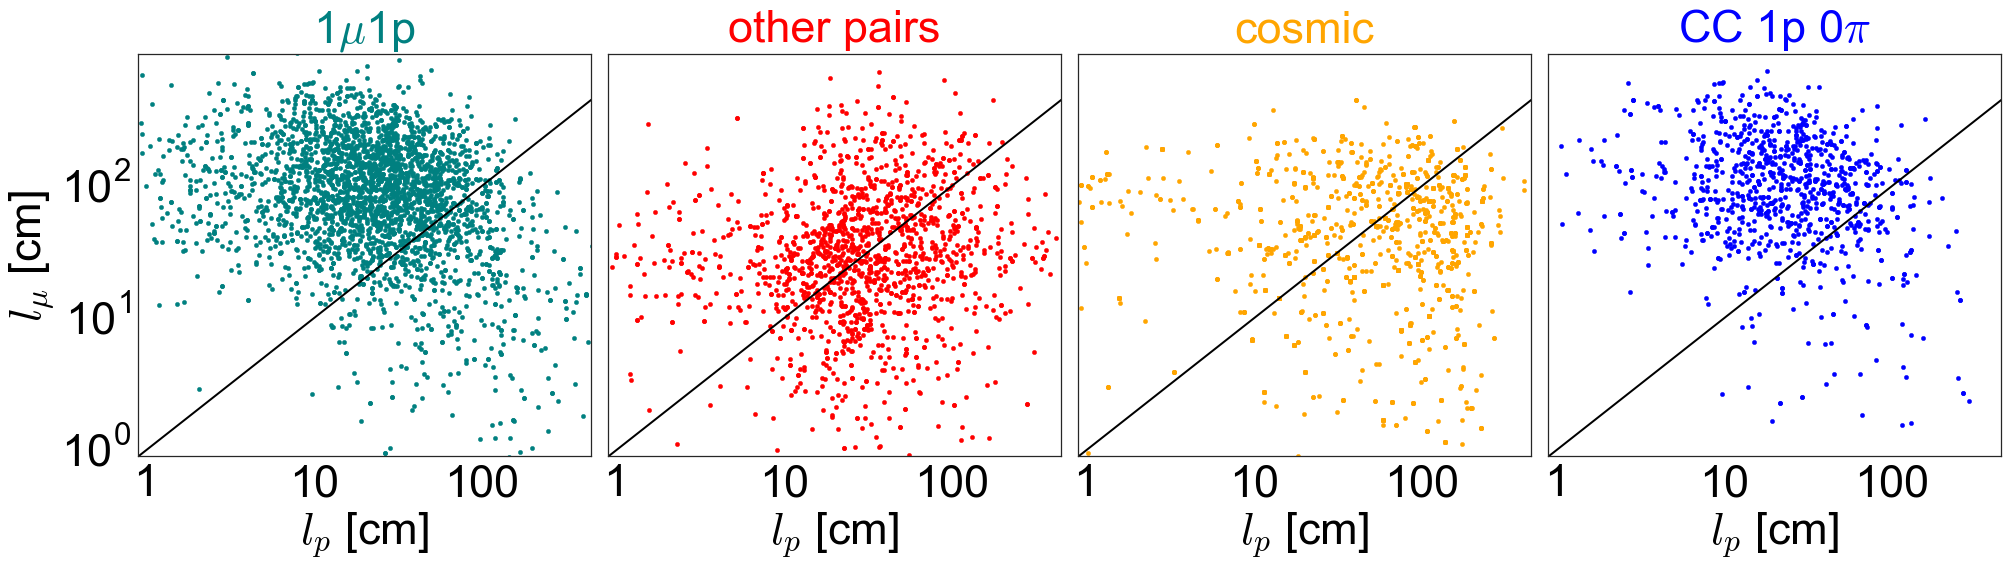

In [11]:
reduced_this_cut,frac=[],[]
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{p}$ [cm]','$l_{\\mu}$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_large_PIDa'], sample['l_small_PIDa'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    plt.plot([0,np.max(sample['l_small_PIDa'])],[0,np.max(sample['l_small_PIDa'])],'-',color='black',linewidth=2)
    plt.plot([0,np.max(sample['l_small_PIDa'])],[0,np.max(sample['l_small_PIDa'])],'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45,xticks=[1,10,100],yticks=[1,10,100])    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p.pdf')

# after cut-1
fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['PIDa'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.scatter(sample['l_large_PIDa'], sample['l_small_PIDa'],color=color)
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    plt.plot([0,np.max(sample['l_small_PIDa'])],[0,np.max(sample['l_small_PIDa'])],'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',fontsize=45,xticks=[1,10,100],yticks=[1,10,100])    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p_after_cut_PIDa.pdf')

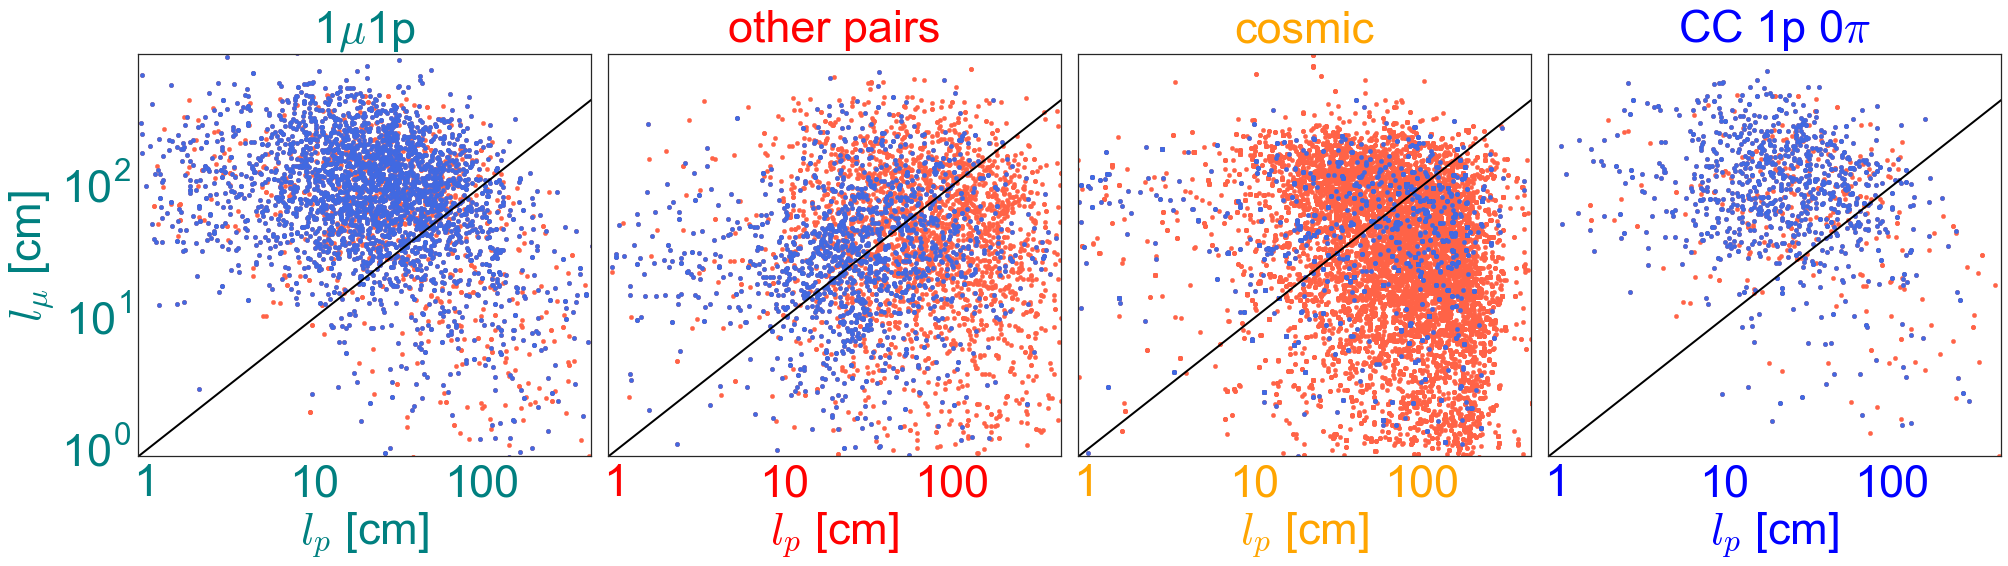

In [12]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,150,50),np.linspace(0,450,50))
x_label,y_label='$l_{p}$ [cm]','$l_{\\mu}$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    for cut_name,scatter_color in zip(['no cut','PIDa'] ,['tomato','royalblue']):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]
        ax.scatter(sample['l_large_PIDa'], sample['l_small_PIDa'],color=scatter_color)        
    ax.set_xlim(0.9,450);ax.set_xscale('log')
    ax.set_ylim(0.9,1000);ax.set_yscale('log')
    plt.plot([0,np.max(sample['l_small_PIDa'])],[0,np.max(sample['l_small_PIDa'])],'-',color='black',linewidth=2)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color=color,fontsize=45,xticks=[1,10,100],yticks=[1,10,100])    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    if i>0: ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
fig.savefig(figures_path+'l_mu_p_before_after_cut_PIDa.pdf')

### 3.I.4 Non collinearity

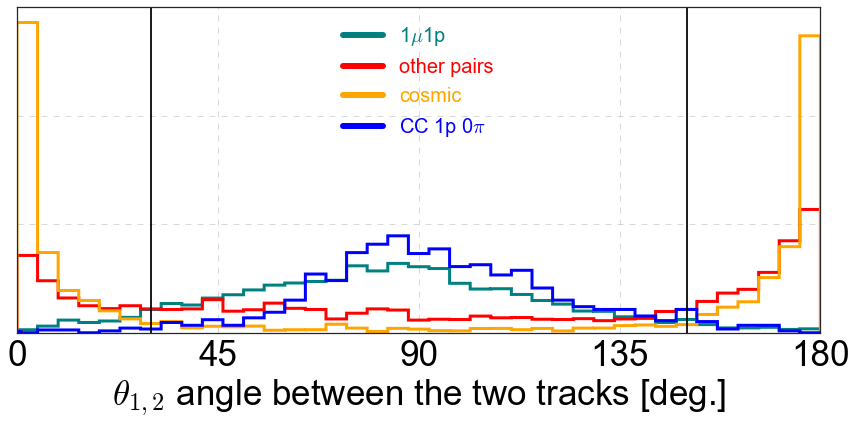

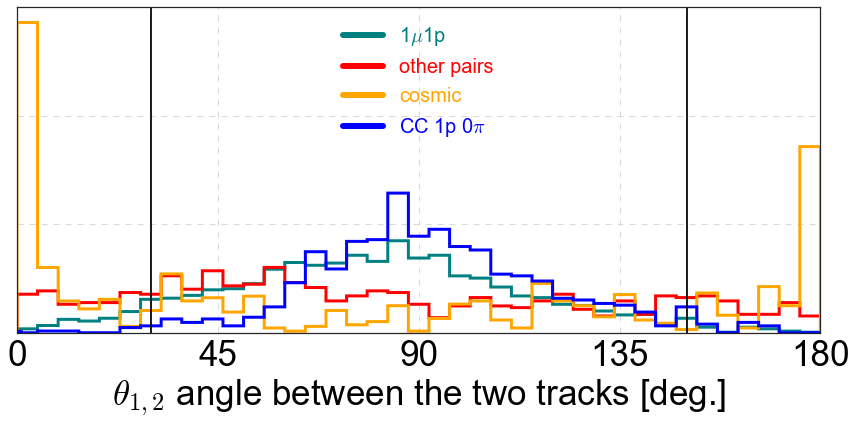

In [13]:
var='theta_12'
x_label='$\\theta_{1,2}$ angle between the two tracks [deg.]'
ax=plot_feature_pairs(cut_name='no cut',var=var,x_label=x_label
                              ,bins=np.linspace(0,180,40),do_add_legend=True
                              ,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([30,30],ax.get_ylim(),'-',color='black')
ax.plot([150,150],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'angle_between_tracks.pdf')
# after cut 2
ax=plot_feature_pairs(cut_name='length',var=var,x_label=x_label
                              ,bins=np.linspace(0,180,40),do_add_legend=True
                              ,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([30,30],ax.get_ylim(),'-',color='black')
ax.plot([150,150],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'angle_between_tracks_after_cut_length.pdf')

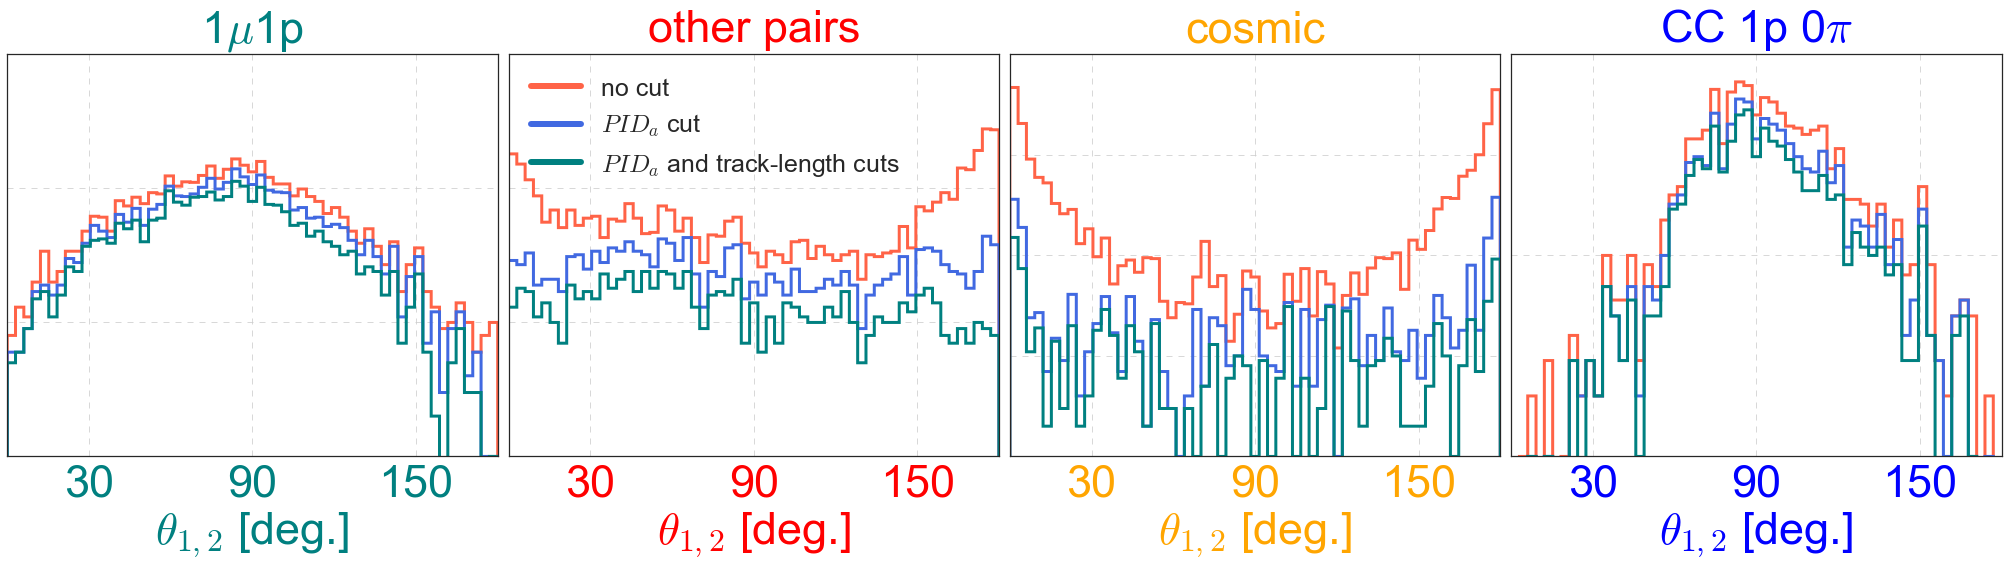

In [14]:
fig = plt.figure(figsize=(28,8))
bins=np.linspace(0,180,60)
x_label='$\\theta_{1,2}$ [deg.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    for cut_name,s_color,s_label in zip(['no cut','PIDa','length'] 
                                        ,['tomato','royalblue','teal']
                                        ,['no cut','$PID_a$ cut','$PID_a$ and track-length cuts']):
        sample = reduced_MCbnbDATAcosmicSamples[cut_name][pair_type]
        theta = sample['theta_12']
        plt.hist(theta,bins=bins,color=s_color,histtype='step',linewidth=3) #,normed=1
        p = plt.plot([0,0], label=s_label,linestyle='-',linewidth=6,color=s_color)
    set_axes(ax,x_label=x_label, y_label='',fontsize=45,xticks=[30,90,150],ticks_color=color,do_add_grid=True) 
    ax.set_yscale('log')
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    if i==1: ax.legend(fontsize=25,loc='upper left')    
plt.tight_layout()
fig.savefig(figures_path+'angle_between_tracks_before_after_cuts_PIDa_length.pdf')

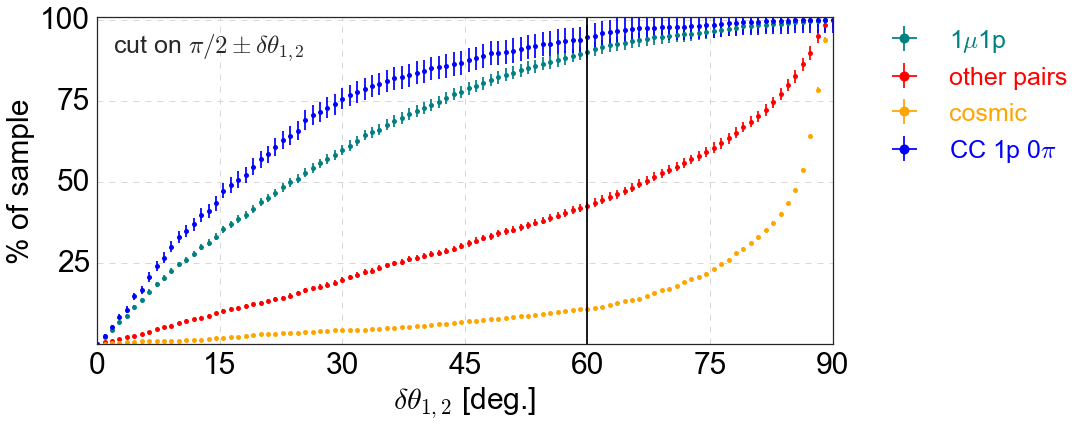

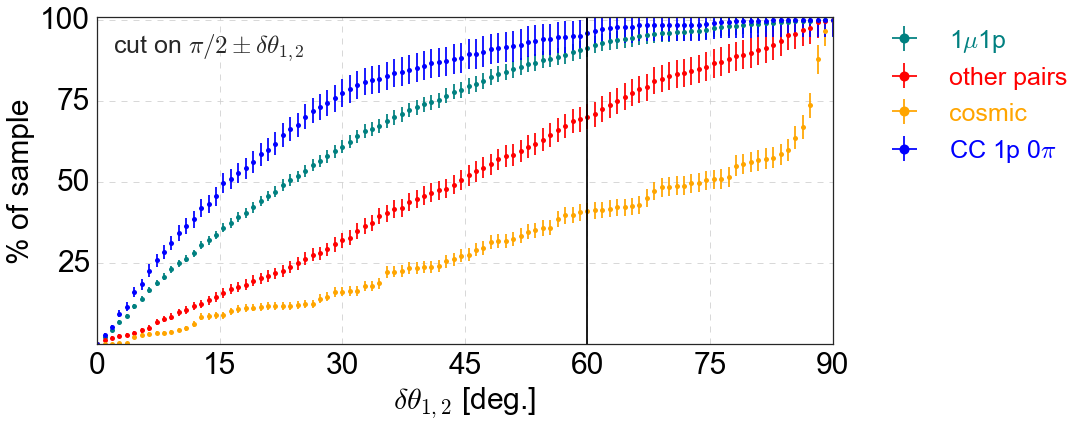

In [15]:
#reduced_samples['cut 3']
ax,leg=plot_cut_samples(reduced_cut_name='no cut',cut_var ='theta_12',do_add_legend=True,
                     cut_type= 'symmetric',fontsize=30,figsize=(12,6),
                     x_label = '$\\delta \\theta_{1,2}$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
ax.text(2,90,'cut on $\\pi/2 \\pm \\delta \\theta_{1,2}$',fontsize=25)
ax.plot([60,60],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'angle_between_tracks_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

# after cut 2
ax,leg=plot_cut_samples(reduced_cut_name='length',cut_var ='theta_12',do_add_legend=True,
                     cut_type= 'symmetric',fontsize=30,figsize=(12,6),
                     x_label = '$\\delta \\theta_{1,2}$ [deg.]',
                     xcenter=90,
                     xmin=0., xmax=90 , Nbins=100)
plt.text(2,90,'cut on $\\pi/2 \\pm \\delta \\theta_{1,2}$',fontsize=25)
plt.plot([60,60],ax.get_ylim(),'-',color='black')
plt.tight_layout()
plt.savefig(figures_path+'angle_between_tracks_cuts_after_cut_length.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

### 0 FV cut

In [16]:

# ------------------------------------------------
def sample_in_FV(sample=None, max_FV_y = 140, # 115 in pandoraNu tracks collection
                 min_FV_z = 5, max_FV_z = 1037,
                 min_FV_x = 3, max_FV_x = 257): # 257
    sample_in_FV = sample[ 
                              (np.abs(sample['starty_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['starty_assigned_proton']) < max_FV_y)
                            & (np.abs(sample['endy_assigned_muon']) < max_FV_y)        
                            & (np.abs(sample['endy_assigned_proton']) < max_FV_y)
                            
                            & ((sample['startz_assigned_muon'] > min_FV_z) & (sample['startz_assigned_muon'] < max_FV_z) )
                            & ((sample['startz_assigned_proton'] > min_FV_z) & (sample['startz_assigned_proton'] < max_FV_z) )                            
                            & ((sample['endz_assigned_muon'] > min_FV_z) & (sample['endz_assigned_muon'] < max_FV_z) )
                            & ((sample['endz_assigned_proton'] > min_FV_z) & (sample['endz_assigned_proton'] < max_FV_z) )

                            & ((sample['startx_assigned_muon'] > min_FV_x) & (sample['startx_assigned_muon'] < max_FV_x) )
                            & ((sample['startx_assigned_proton'] > min_FV_x) & (sample['startx_assigned_proton'] < max_FV_x) )                            
                            & ((sample['endx_assigned_muon'] > min_FV_x) & (sample['endx_assigned_muon'] < max_FV_x) )
                            & ((sample['endx_assigned_proton'] > min_FV_x) & (sample['endx_assigned_proton'] < max_FV_x) )
                           ]
    return sample_in_FV
# ------------------------------------------------


In [17]:
pairs = pd.read_csv(vertices_files_path+'prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_vertices.csv')
MCbnbDATAcosmicPairsFV = sample_in_FV(pairs, max_FV_y = 110, # 115 in pandoraNu tracks collection
                 min_FV_z = 5, max_FV_z = 1037,
                 min_FV_x = 3, max_FV_x = 250)
print len(pairs),'pairs from MC-BNB + cosmic DATA overlay'
print len(MCbnbDATAcosmicPairsFV),'pairs in FV'

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV


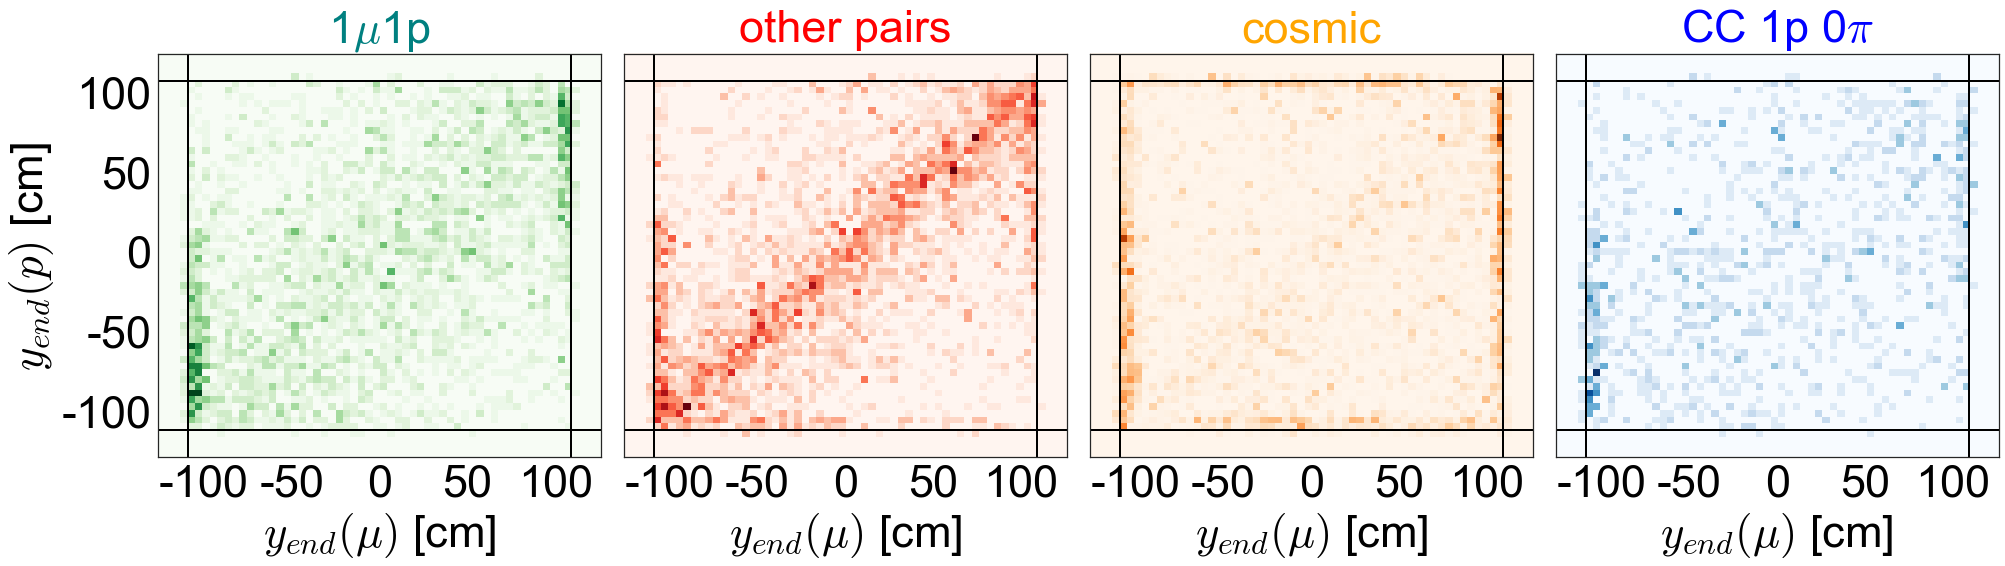

In [18]:
xCut = [3,250]
yCut = [-109,109]
zCut = [5,1037]
fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['no cut'][pair_type]    
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['endy_assigned_muon'], sample['endy_assigned_proton']
                 ,ax=ax,fontsize=25
                 ,bins=(np.linspace(-126,126,61),np.linspace(-126,126,61))
                 ,cmap=cmap,norm='')
    
    plt.plot([yCut[0],yCut[0]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot([yCut[1],yCut[1]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[0],yCut[0]],'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[1],yCut[1]],'-',color='black',linewidth=2)
    set_axes(ax
             ,x_label=r'$y_{end}(\mu)$ [cm]'
             ,y_label=r'$y_{end}(p)$ [cm]' if i==0 else ''
             ,ticks_color='black',fontsize=45
            )
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Appendices/ResponseToReviewers/Figures/FVcut.pdf')

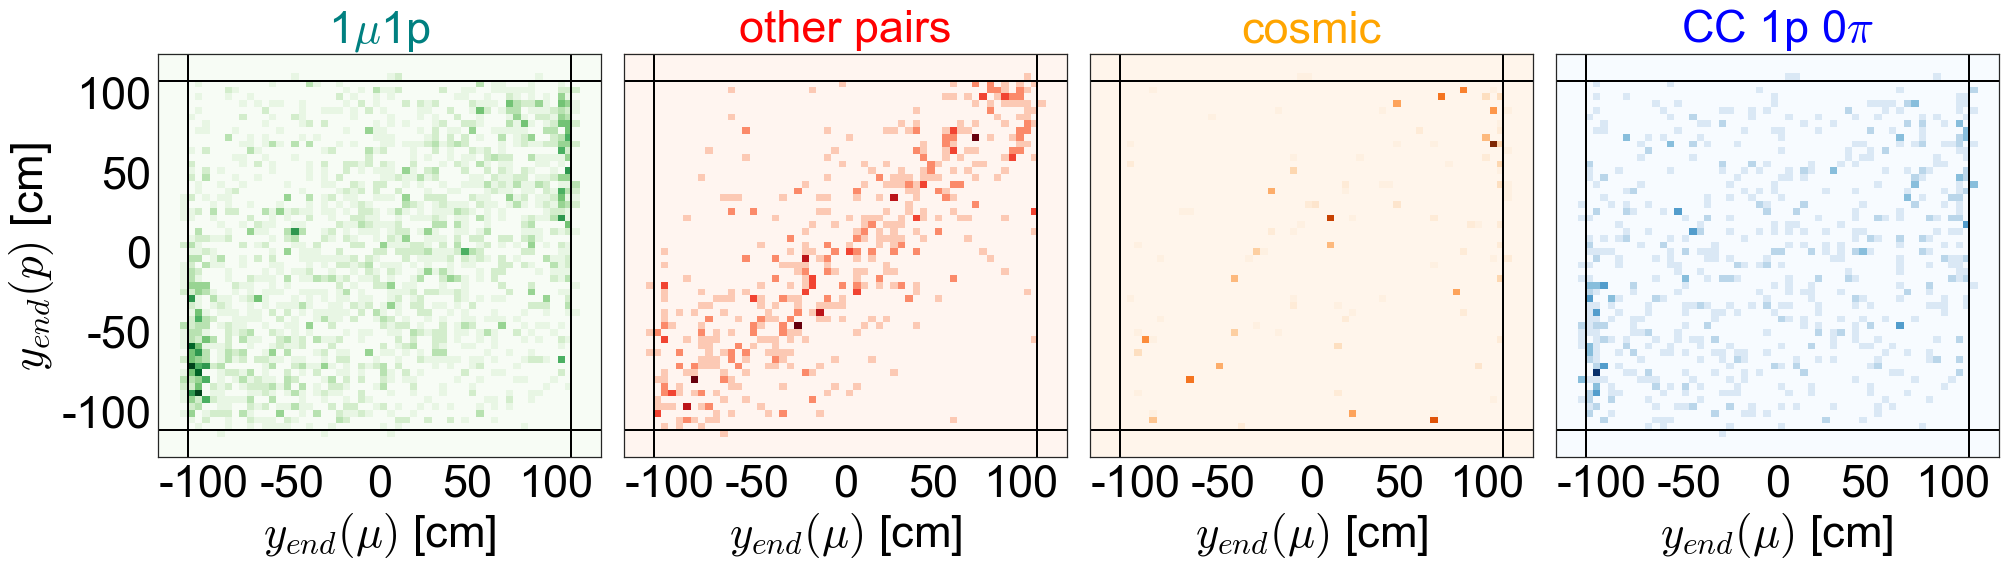

In [23]:
fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['non-collinearity'][pair_type]    
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['endy_assigned_muon'], sample['endy_assigned_proton']
                 ,ax=ax,fontsize=25
                 ,bins=(np.linspace(-126,126,61),np.linspace(-126,126,61))
                 ,cmap=cmap,norm='')
    
    plt.plot([yCut[0],yCut[0]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot([yCut[1],yCut[1]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[0],yCut[0]],'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[1],yCut[1]],'-',color='black',linewidth=2)
    set_axes(ax
             ,x_label=r'$y_{end}(\mu)$ [cm]'
             ,y_label=r'$y_{end}(p)$ [cm]' if i==0 else ''
             ,ticks_color='black',fontsize=45
            )
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Appendices/ResponseToReviewers/Figures/FVcut_after_non_collinearity.pdf')

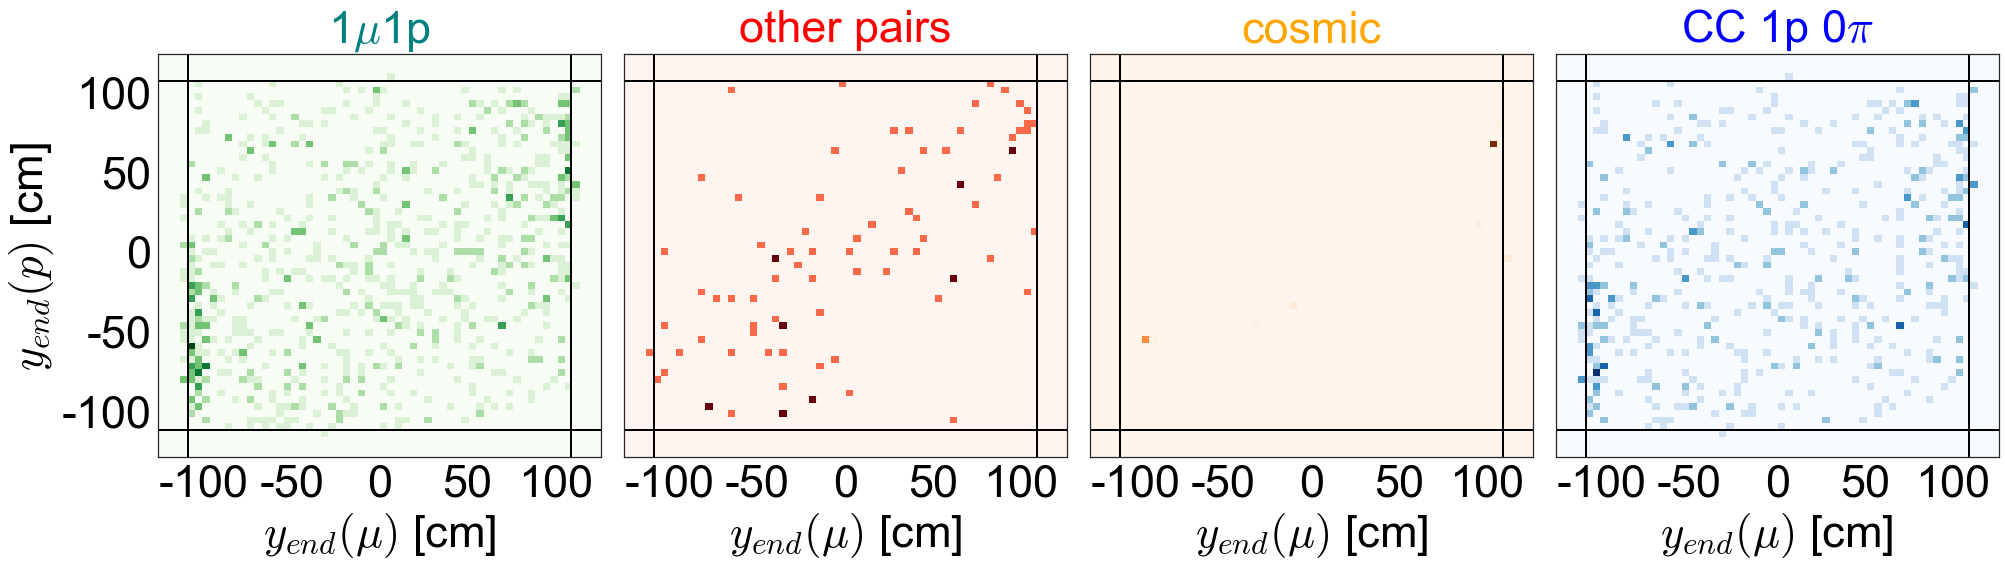

In [24]:
fig = plt.figure(figsize=(28,8))
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]    
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['endy_assigned_muon'], sample['endy_assigned_proton']
                 ,ax=ax,fontsize=25
                 ,bins=(np.linspace(-126,126,61),np.linspace(-126,126,61))
                 ,cmap=cmap,norm='')
    
    plt.plot([yCut[0],yCut[0]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot([yCut[1],yCut[1]],ax.get_ylim(),'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[0],yCut[0]],'-',color='black',linewidth=2)
    plt.plot(ax.get_xlim(),[yCut[1],yCut[1]],'-',color='black',linewidth=2)
    set_axes(ax
             ,x_label=r'$y_{end}(\mu)$ [cm]'
             ,y_label=r'$y_{end}(p)$ [cm]' if i==0 else ''
             ,ticks_color='black',fontsize=45
            )
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Appendices/ResponseToReviewers/Figures/FVcut_after_delta_phi.pdf')

## 3.III Removing events with large energy deposit by undetected particles 
take event-display images and distributions from 
### RdQaroundVertex_box_optimization.ipynb

## flash matching

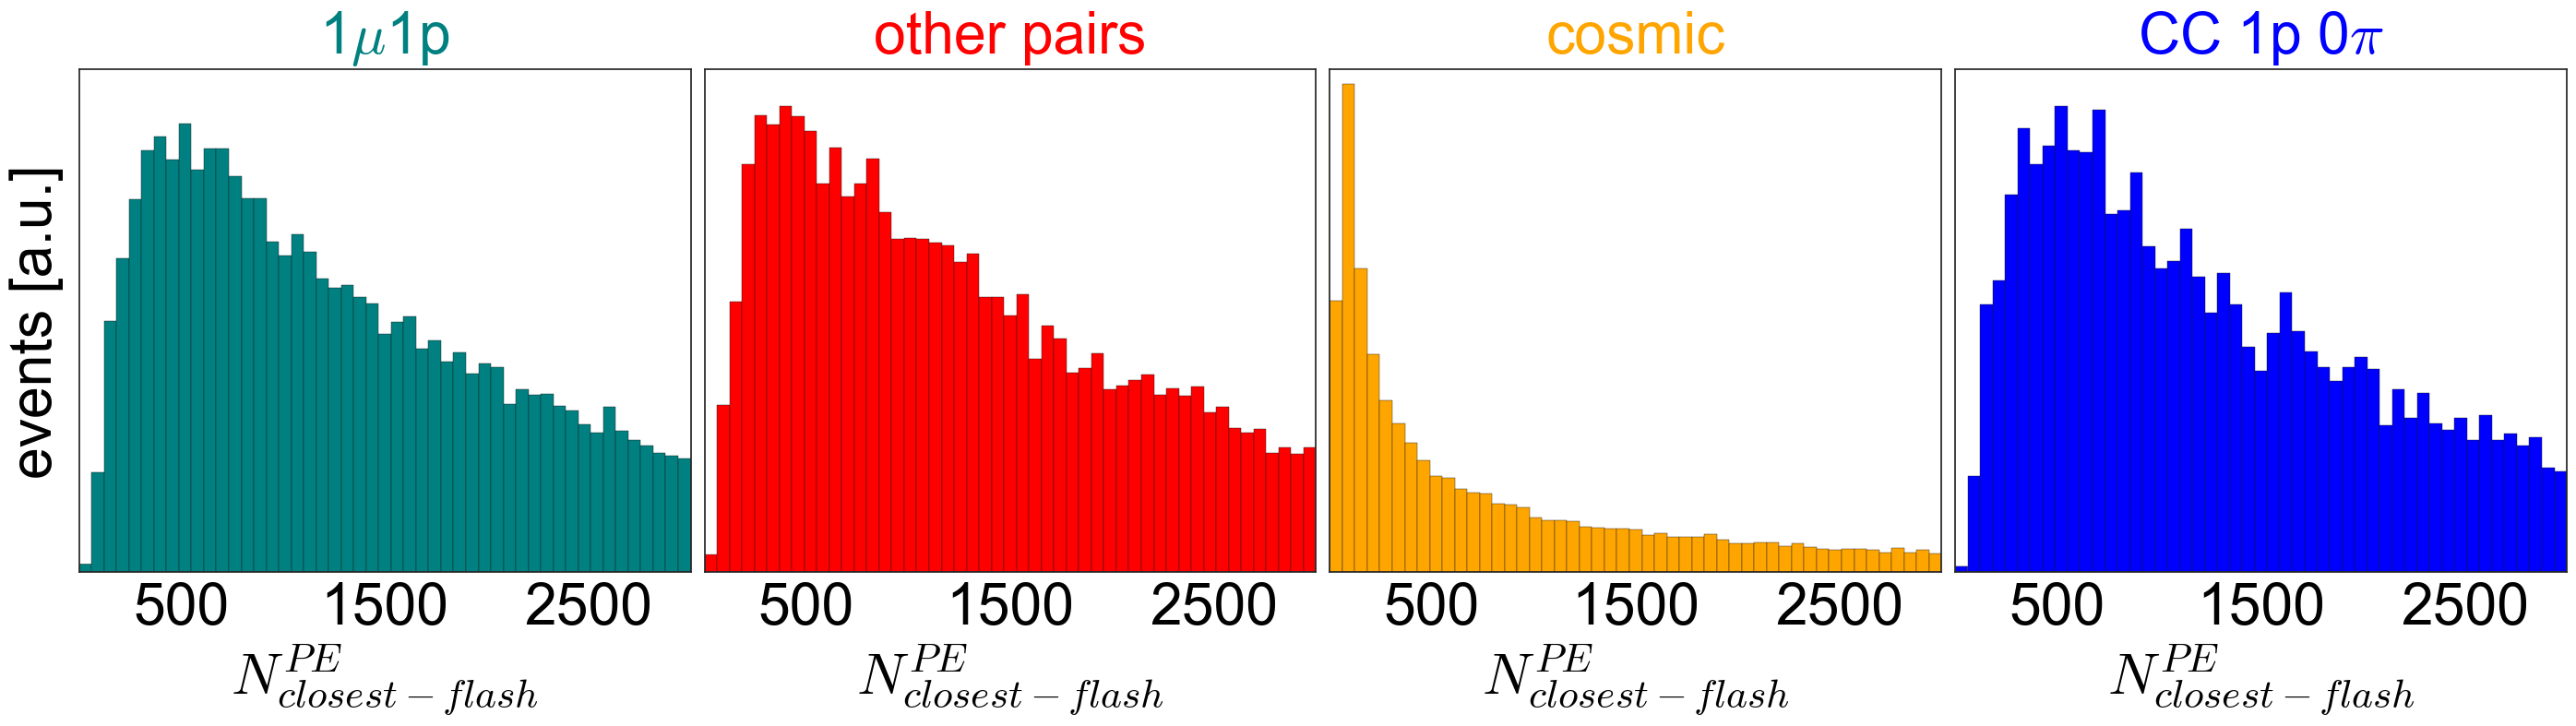

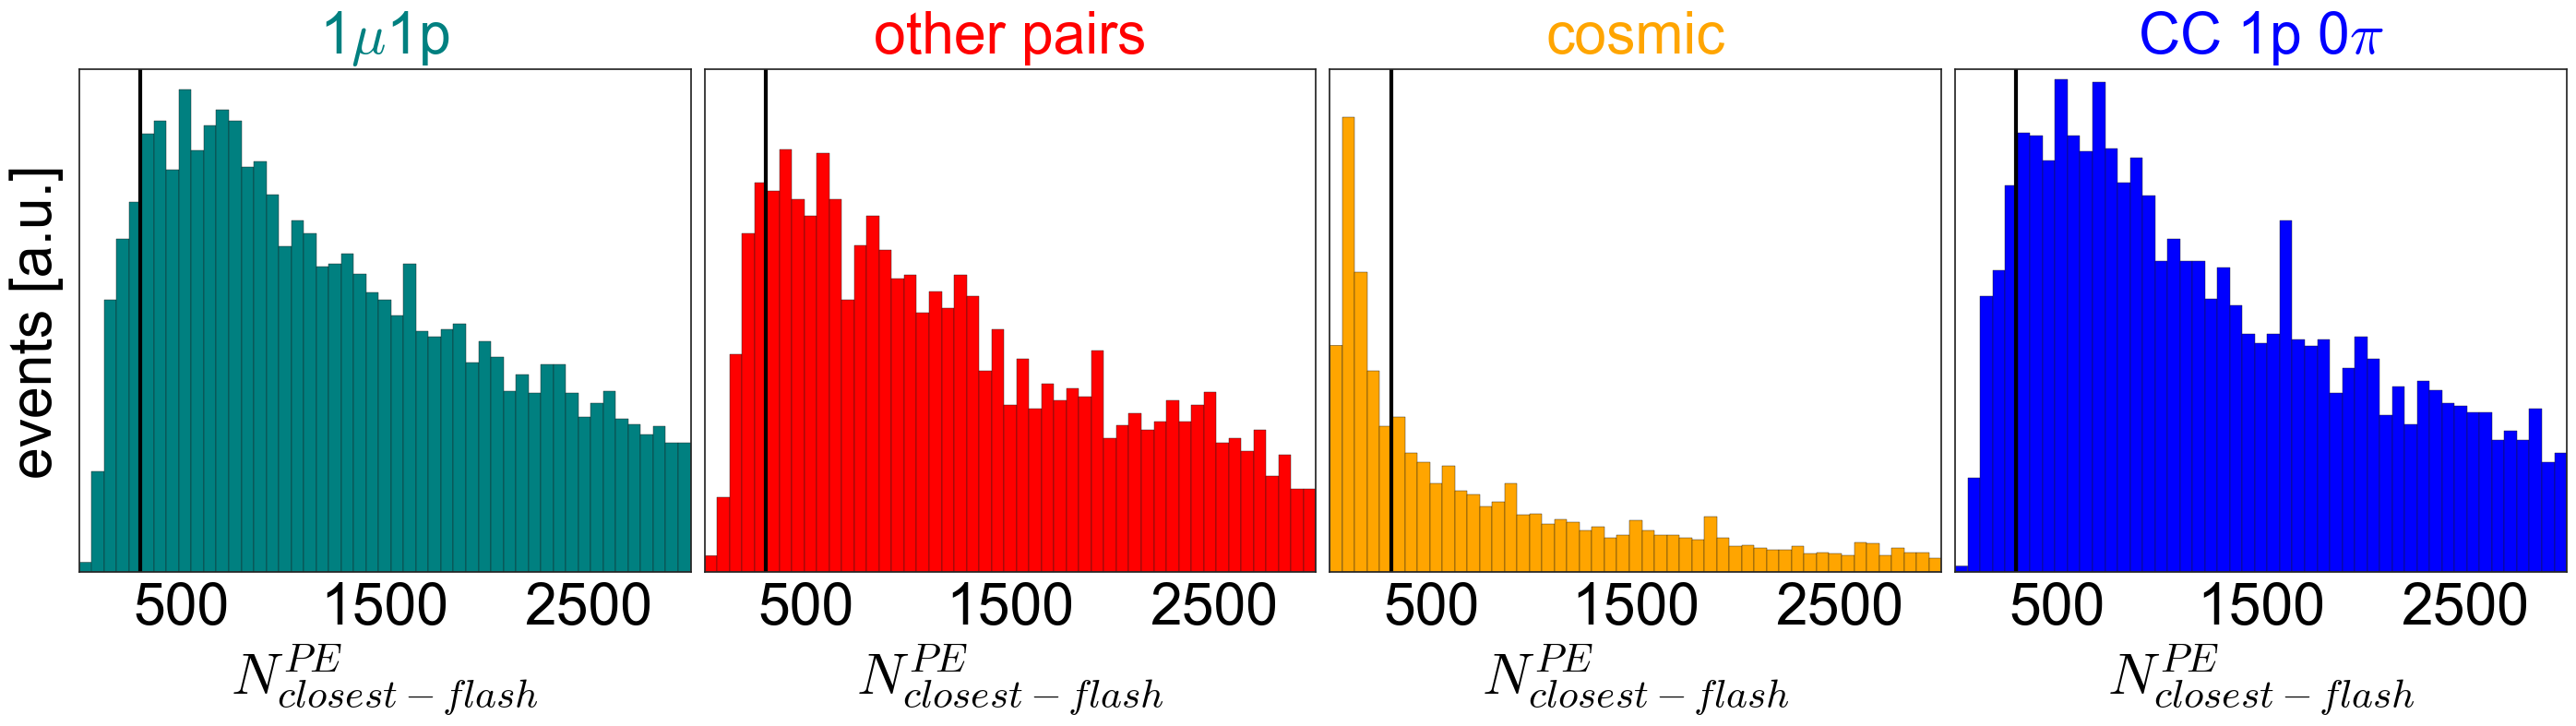

In [14]:
# vertex closest flash total PE
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,3000,50))
x_label,y_label=r'$N_{closest-flash}^{PE}$','events [a.u.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plt.hist(sample['ClosestFlash_TotalPE'],bins=bins,color=color)
#     plt.plot([FlashCut,FlashCut],ax.get_ylim(),'-',color='black',linewidth=3)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45
             ,xticks=[500,1500,2500]
            )
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
plt.savefig(figures_path+'ClosestFlash_TotalPE.pdf')


# vertex closest flash total PE
Flash_PE_Cut = 300
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,3000,50))
x_label,y_label=r'$N_{closest-flash}^{PE}$','events [a.u.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbMCcosmicSamples['non-collinearity'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plt.hist(sample['ClosestFlash_TotalPE'],bins=bins,color=color)
    plt.plot([Flash_PE_Cut,Flash_PE_Cut],ax.get_ylim(),'-',color='black',linewidth=3)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45
             ,xticks=[500,1500,2500]
            )
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
plt.savefig(figures_path+'ClosestFlash_TotalPE_after_cut_collinearity.pdf')

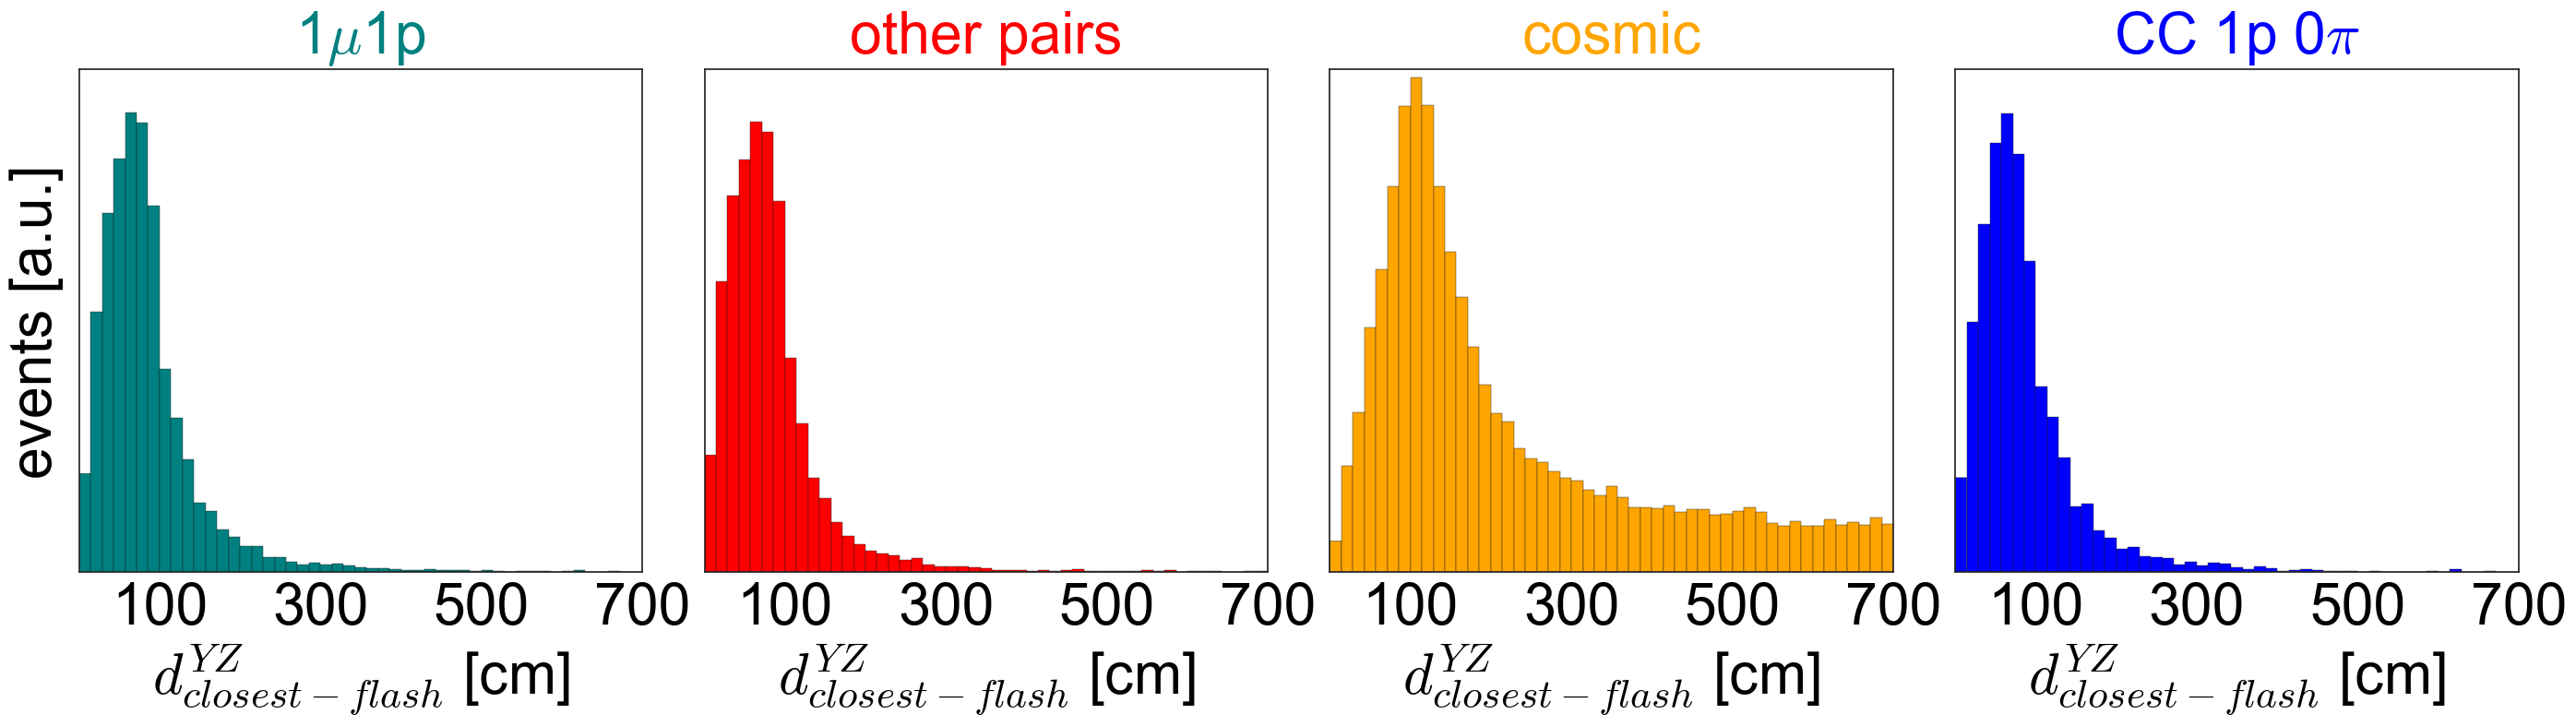

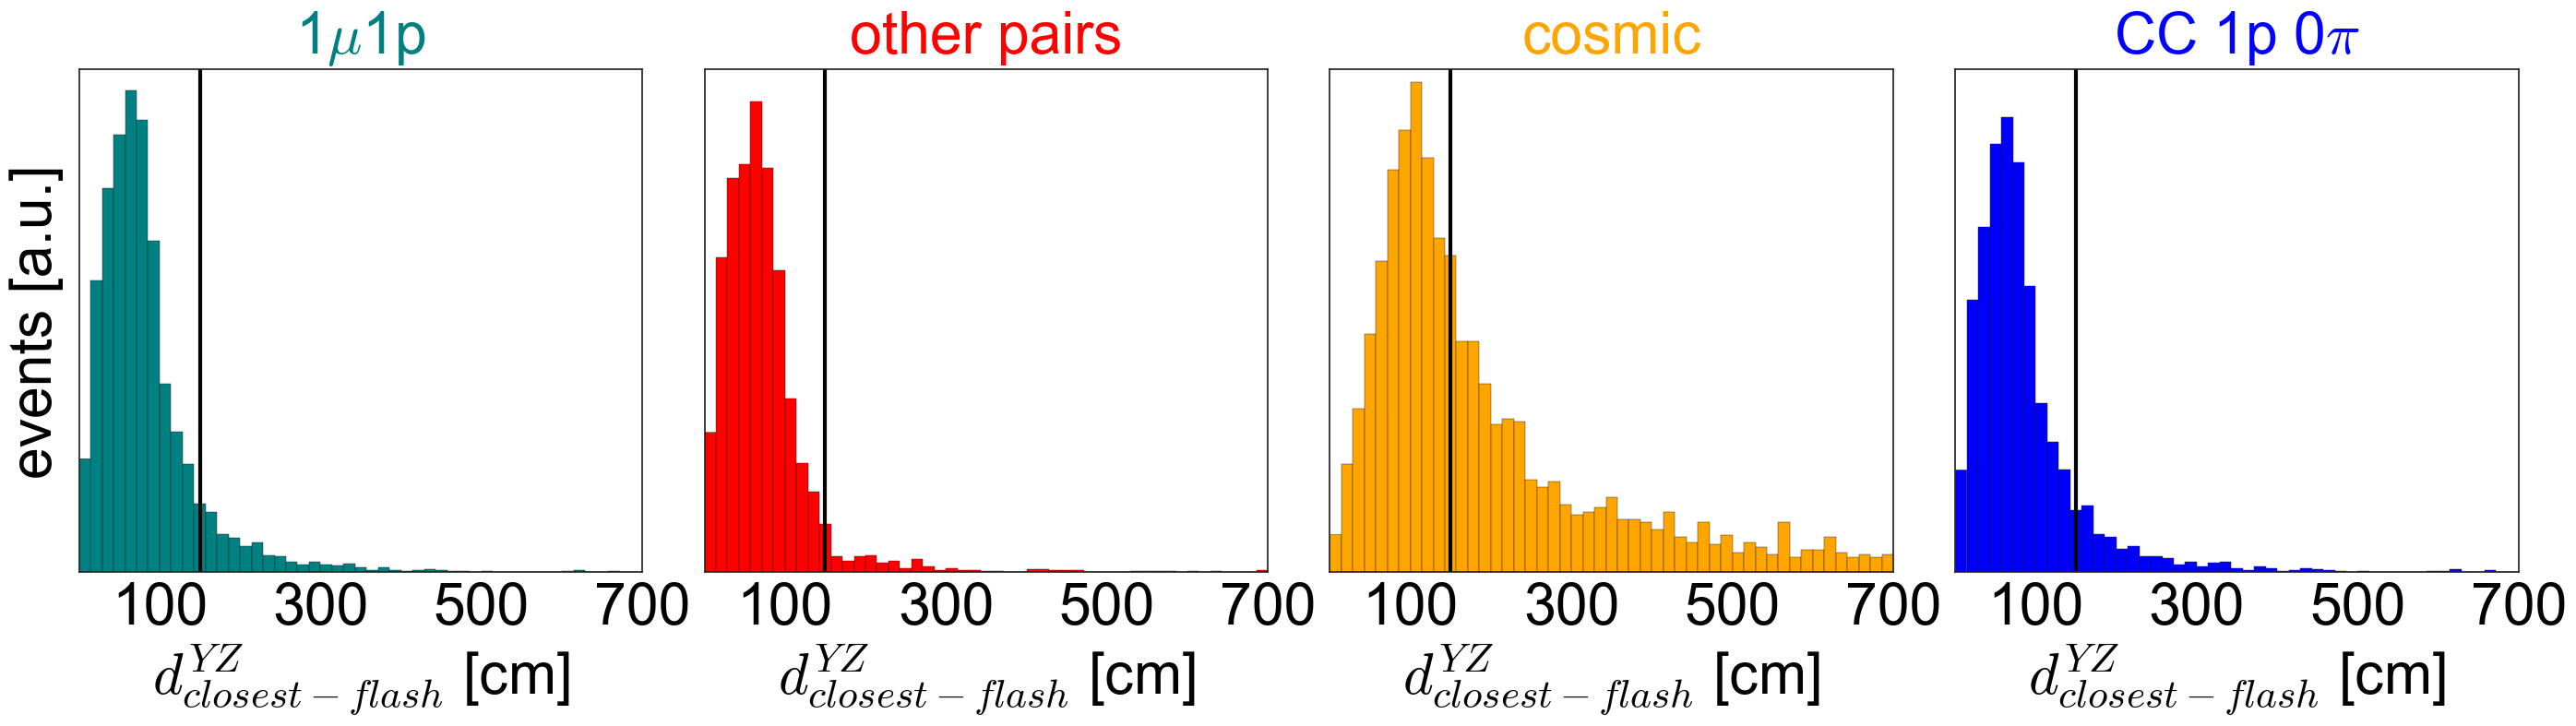

In [15]:
# vertex closest flash
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,700,50))
x_label,y_label=r'$d_{closest-flash}^{YZ}$ [cm]','events [a.u.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plt.hist(sample['ClosestFlash_YZdistance'],bins=bins,color=color)
#     plt.plot([FlashCut,FlashCut],ax.get_ylim(),'-',color='black',linewidth=3)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45
             ,xticks=[100,300,500,700]
            )
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
plt.savefig(figures_path+'ClosestFlash_YZdistance.pdf')

# after cut 4: closest flash N(PE)
Flash_dYZ_Cut = 150
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,700,50))
x_label,y_label=r'$d_{closest-flash}^{YZ}$ [cm]','events [a.u.]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbMCcosmicSamples['closest-flash PE'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plt.hist(sample['ClosestFlash_YZdistance'],bins=bins,color=color)
    plt.plot([Flash_dYZ_Cut,Flash_dYZ_Cut],ax.get_ylim(),'-',color='black',linewidth=3)
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=45
             ,xticks=[100,300,500,700]
            )
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.NullFormatter())    
plt.tight_layout()
plt.savefig(figures_path+'ClosestFlash_YZdistance_after_cut_flashPE.pdf')

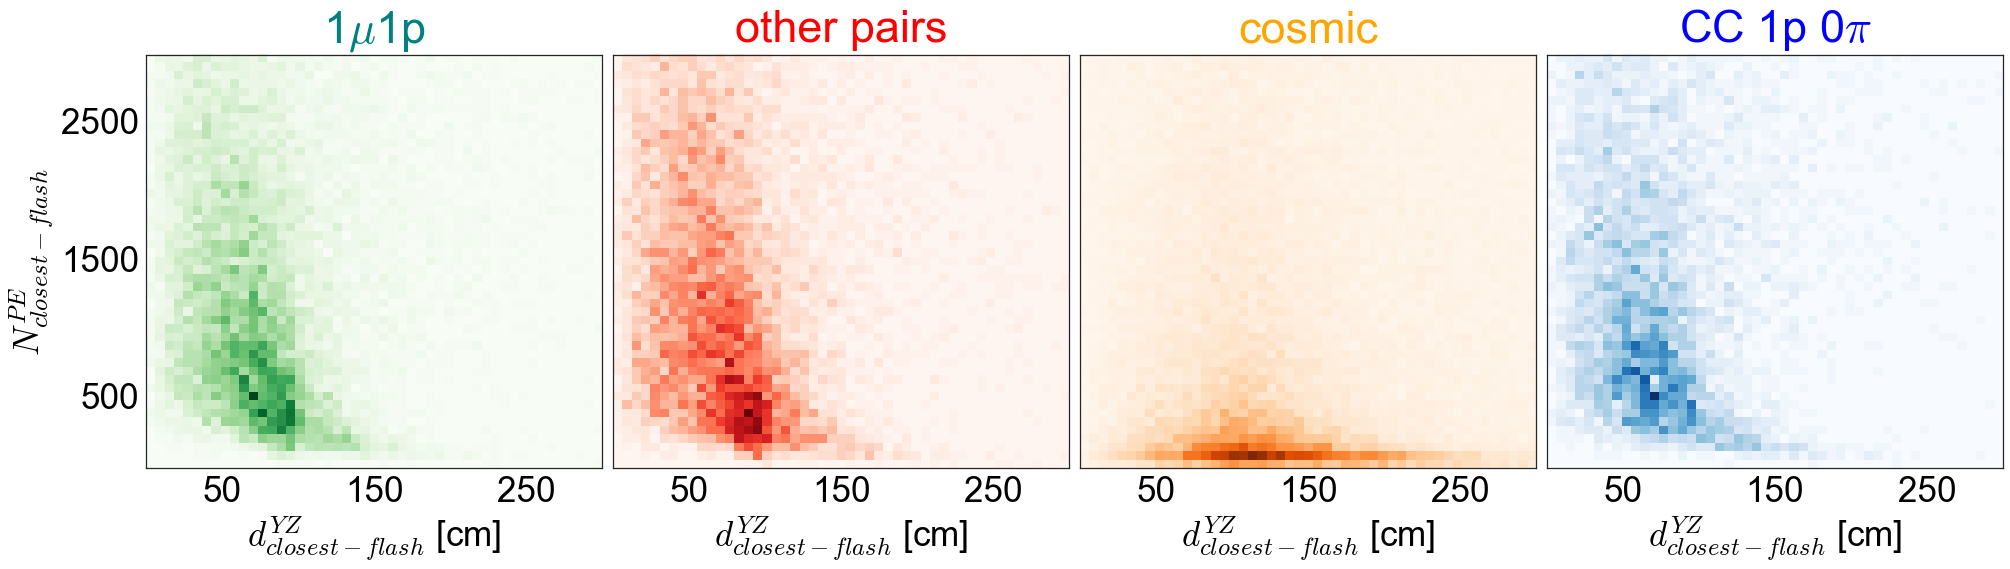

In [31]:
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,300,50),np.linspace(0,3000,50))
x_label,y_label=r'$d_{closest-flash}^{YZ}$ [cm]',r'$N_{closest-flash}^{PE}$'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    plot_2d_hist(sample['ClosestFlash_YZdistance'], sample['ClosestFlash_TotalPE'], ax=ax,fontsize=25,bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=35
             ,xticks=[50,150,250],yticks=[500,1500,2500]
            )
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()

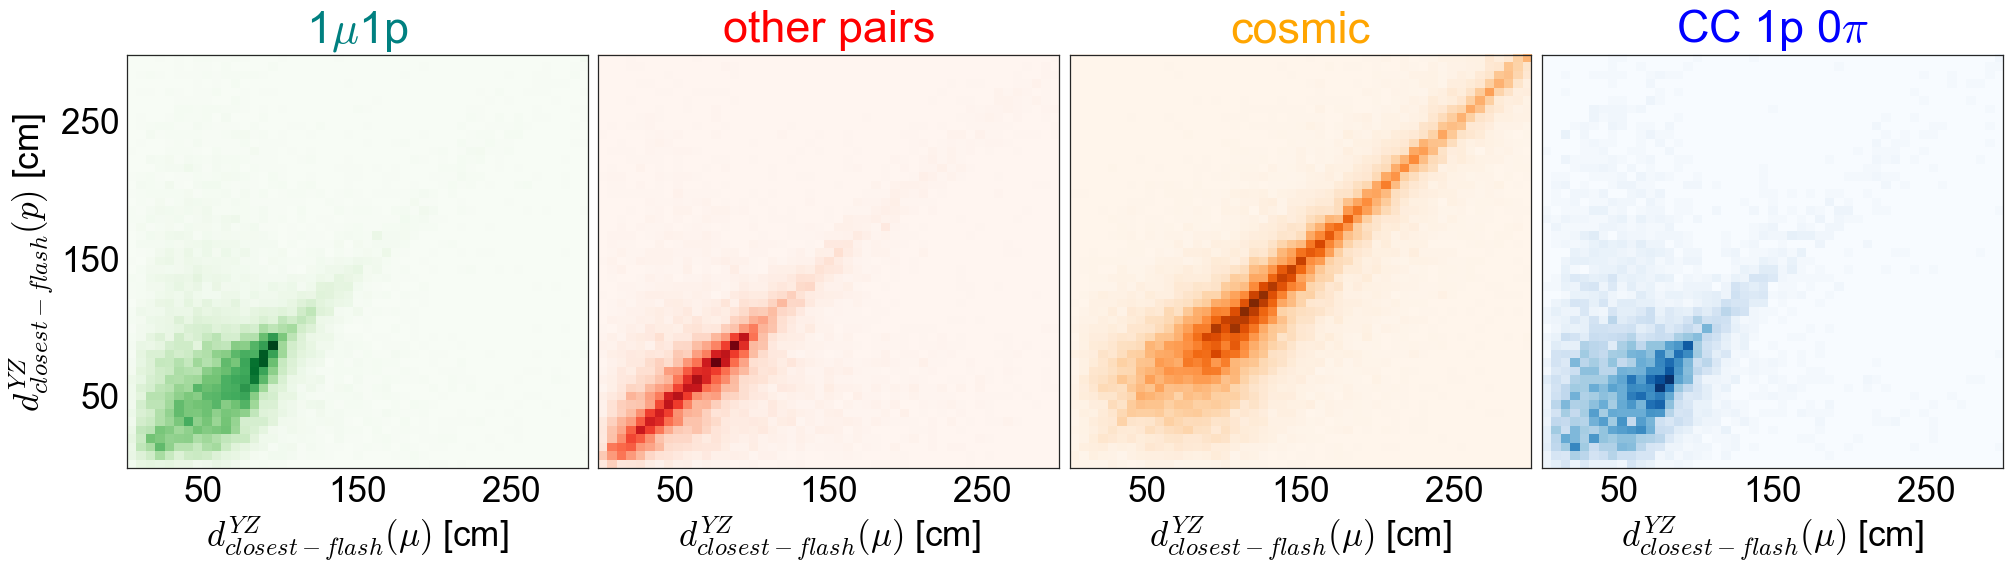

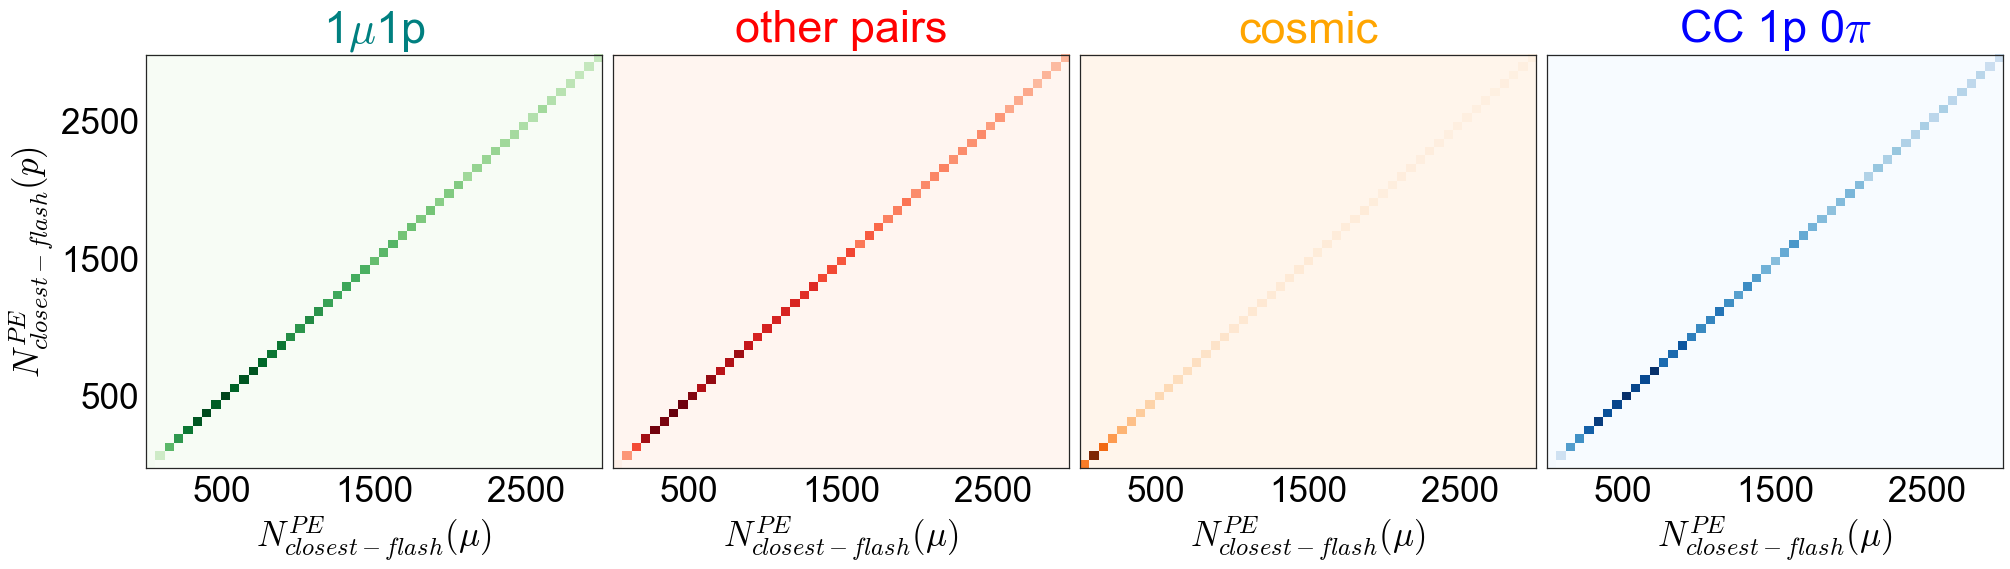

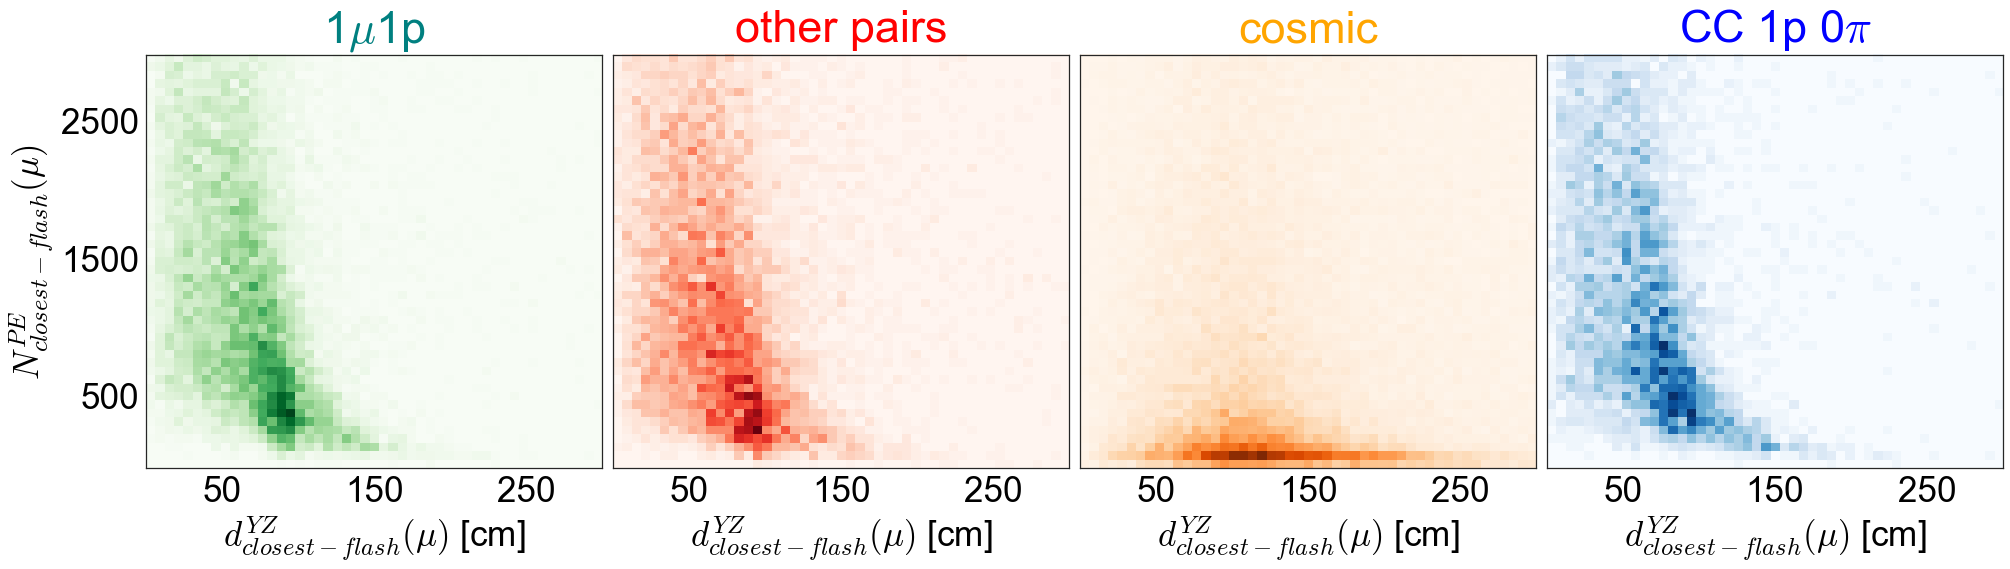

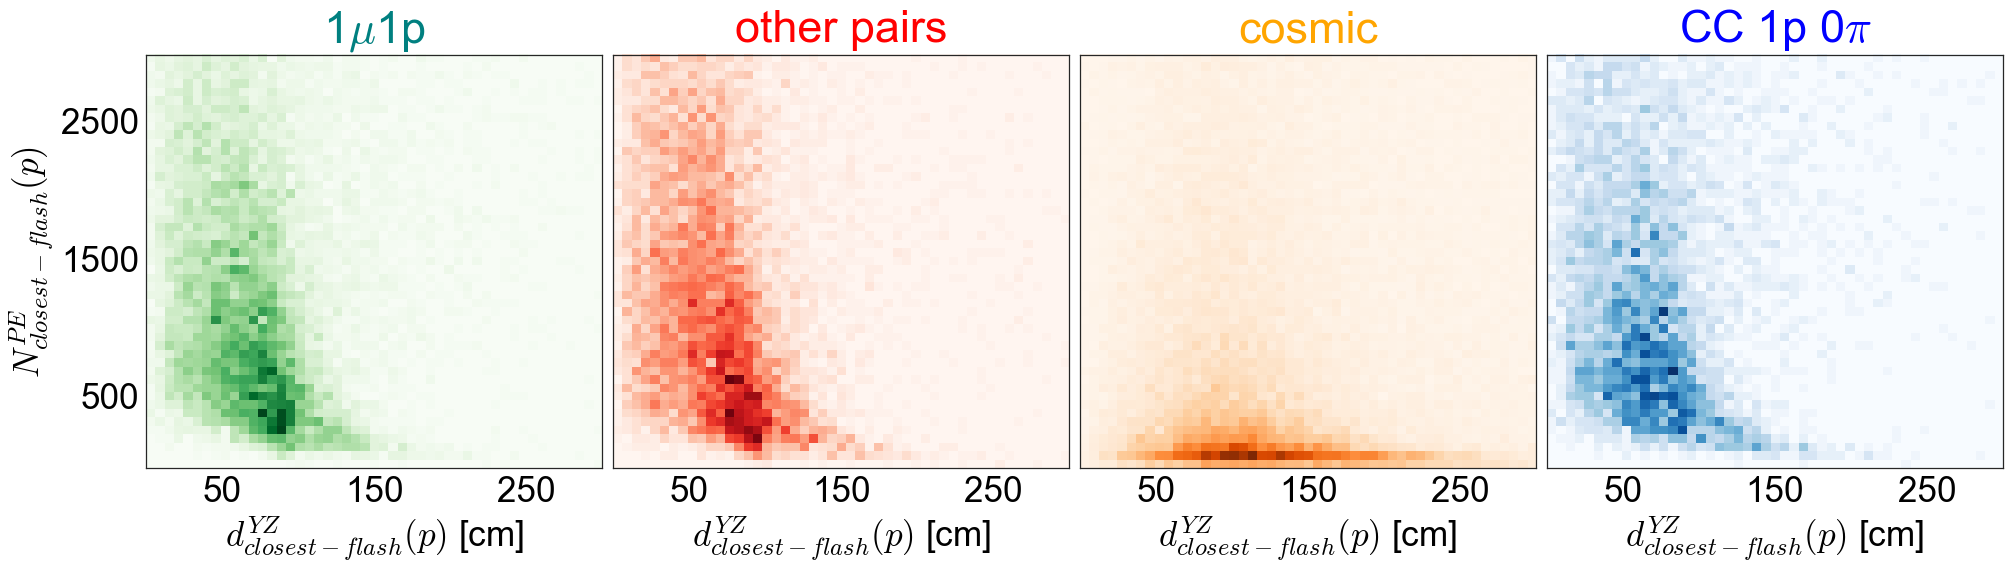

In [39]:
# assigned muon and proton
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,300,50),np.linspace(0,300,50))
x_label,y_label=r'$d_{closest-flash}^{YZ}(\mu)$ [cm]',r'$d_{closest-flash}^{YZ}(p)$ [cm]'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    plot_2d_hist(sample['ClosestFlash_YZdistance_assigned_muon'], sample['ClosestFlash_YZdistance_assigned_proton'], ax=ax,fontsize=25,bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=35
             ,xticks=[50,150,250],yticks=[50,150,250]
            )
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()


# assigned muon and proton
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,3000,50),np.linspace(0,3000,50))
x_label,y_label=r'$N_{closest-flash}^{PE}(\mu)$',r'$N_{closest-flash}^{PE}(p)$'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    plot_2d_hist(sample['ClosestFlash_TotalPE_assigned_muon'], sample['ClosestFlash_TotalPE_assigned_proton'], ax=ax,fontsize=25,bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=35
             ,xticks=[500,1500,2500],yticks=[500,1500,2500]
            )
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()


# assigned muon
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,300,50),np.linspace(0,3000,50))
x_label,y_label=r'$d_{closest-flash}^{YZ}(\mu)$ [cm]',r'$N_{closest-flash}^{PE}(\mu)$'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    plot_2d_hist(sample['ClosestFlash_YZdistance_assigned_muon'], sample['ClosestFlash_TotalPE_assigned_muon'], ax=ax,fontsize=25,bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=35
             ,xticks=[50,150,250],yticks=[500,1500,2500]
            )
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()



# assigned proton
fig = plt.figure(figsize=(28,8))
bins=(np.linspace(0,300,50),np.linspace(0,3000,50))
x_label,y_label=r'$d_{closest-flash}^{YZ}(p)$ [cm]',r'$N_{closest-flash}^{PE}(p)$'
for i,(pair_type,label,cmap,color) in enumerate(zip(pair_types,MClabels,MCcmaps,MCcolors)):
    sample = reduced_MCbnbMCcosmicSamples['no cut'][pair_type]
    ax = fig.add_subplot(1,4,i+1)
    plot_2d_hist(sample['ClosestFlash_YZdistance_assigned_proton'], sample['ClosestFlash_TotalPE_assigned_proton'], ax=ax,fontsize=25,bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label=x_label, y_label=y_label if i==0 else '',ticks_color='black',fontsize=35
             ,xticks=[50,150,250],yticks=[500,1500,2500]
            )
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f') if i==0 else ticker.NullFormatter())    
plt.tight_layout()